# FAIRStream Case Studies
This toturial is a gallery of multiple cases of Medical AI using FAIRStream to make prediction on multivariate time series data from NICU infants might associated with unfavorable respiratory events, and ICU adult patient might associated with bloodstream infection events.
- Make the predictions all at once
    - forecast 1 step on 1 numeric variable
    - forecast >1 steps on 1 numeric variable
    - forecast 1 categorical variable (classification)
- Autoregressive prediction

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import FAIRStream

## Case 4

In this case study, we deal with **every 15 minutes prediction**. We will use 3 types of deep learning models to forecast an ICU adult patient's blood culture test results.
Input

> * ICU adults' vital signs and lab results in minutes

Output 

> * 3 categories of blood culture status -- positive / negative / no blood culture placed

Classification strategy
> * summarize/use a certain length of per-minute inputs to every 15 minutes record since admission
> * train, test datasets split by subject

### Setup

In [2]:
bsi_stream = FAIRStream.FAIRStream('../project1_15mins')
csv_pool_path = '../project1_15mins/csv_pool'
bsi_stream.querier.update_variable_dict()
bsi_stream.engineer.read_variable_dict()

Success: Querier has initiated a csv source dictionary in:../project1_15mins/meta_data/csv_source_dict_demo.json
Success: Querier has initiated a variable dictionary in:../project1_15mins/meta_data/variable_dict_demo.json
Unable to read sql source dictionary. Use Querier.update_sql_source_dict() to build one.
Success: Querier has updated variable dictionary!


In [ ]:
bsi_stream.engineer.DefineEpisode(input_time_len=2*24*60, output_time_len=1, time_resolution=60, time_lag=0, anchor_gap=14*24*60)
bsi_stream.engineer.BuildMVTS(csv_pool_path, nsbj=5000, valid_frac=0, test_frac=0, batch_size=32, impute_input='lalala', impute_output='lalala')
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = bsi_stream.engineer.ExtractXY(shape_type="2d")
bsi_stream.engineer.info()

 
Success! An episode is defined to 
--- use 2880 minute(s) long input variables 
--- predict 1 minute(s) response variables into the future
--- lag 0 minute(s) between predictors and responses
--- increase by every 60 minute(s)
--- last at most 20160 minute(s) long
Success! Engineer has updated attributes --- episode. 
--- fix upper boundary for age by 110.0
--- fix lower boundary for age by 18.0
--- fix upper boundary for age by 110.0
--- fix lower boundary for age by 19.0
--- minmax scaling temp
--- fix upper boundary for heart_rate by nan
--- fix lower boundary for heart_rate by nan
--- fix upper boundary for systolic_blood_pressure by nan
--- fix lower boundary for systolic_blood_pressure by nan
--- fix upper boundary for diastolic_blood_pressure by nan
--- fix lower boundary for diastolic_blood_pressure by nan
--- fix upper boundary for resp_rate by nan
--- fix lower boundary for resp_rate by nan
--- fix upper boundary for glucose by nan
--- fix lower boundary for glucose by nan


In [7]:
bsi_stream.engineer.train_df.to_csv("../FAIRStreamViz/data/data1.csv",index=False)

age___lab    age___vital  temp___vital  heart_rate___vital  \
count  117894.000000  128968.000000    170.000000          116.000000   
mean       66.047797      65.869172      0.716554           90.734773   
std        18.141661      17.978419      0.078894           19.751711   
min        18.000000      15.782084      0.508475           50.000000   
25%        54.000000      54.666667      0.656780           77.375000   
50%        66.000000      66.000000      0.711156           89.500000   
75%        77.000000      77.500000      0.767597          101.600000   
max       110.000000     110.000000      0.940239          159.500000   

       systolic_blood_pressure___vital  diastolic_blood_pressure___vital  \
count                       194.000000                        194.000000   
mean                        126.169618                         69.248994   
std                          25.730048                         16.755962   
min                          80.000000                         32.500000   
25%                         106.166667                         57.000000   
50%                         123.375000                         66.000000   
75%                         140.916667                         79.833333   
max                         209.000000                        133.000000   

       resp_rate___vital  glucose___vital  bilirubin___vital  \
count         113.000000      1737.000000         899.000000   
mean           19.703915       137.193245           1.036819   
std             5.414796        65.932838           2.377889   
min             8.000000        49.000000           0.100000   
25%            15.685111        97.000000           0.300000   
50%            19.000000       116.000000           0.400000   
75%            23.000000       157.000000           0.700000   
max            37.800000       460.000000          31.500000   

       potassium___vital  ...  troponin___vital  ptt___vital  lactate___vital  \
count        1848.000000  ...        248.000000   823.000000       439.000000   
mean            4.369116  ...          0.497379    32.833536         2.650456   
std             0.722379  ...          1.937377    17.538623         2.318717   
min             2.400000  ...          0.010000    17.600000         0.600000   
25%             3.900000  ...          0.030000    25.400000         1.400000   
50%             4.300000  ...          0.070000    28.300000         2.000000   
75%             4.700000  ...          0.242500    33.050000         3.000000   
max             6.600000  ...         25.800000   150.000000        27.700000   

       bun___vital          y___1          y___0     __time_bin  \
count  1916.000000  128968.000000  128968.000000  128968.000000   
mean     28.247912       0.010258       0.095365    9798.213146   
std      19.849081       0.100763       0.293719   15429.584760   
min       3.000000       0.000000       0.000000  -35223.000000   
25%      16.000000       0.000000       0.000000     -16.000000   
50%      22.000000       0.000000       0.000000    2547.000000   
75%      34.000000       0.000000       0.000000   12201.000000   
max     143.000000       1.000000       1.000000   84453.000000   

            __anchor  episode_relative_time  episode_order  
count  128968.000000          128968.000000  128968.000000  
mean        0.115881           -1440.000000       6.662614  
std         0.350672             848.531427      10.281756  
min         0.000000           -2880.000000       1.000000  
25%         0.000000           -2160.000000       1.000000  
50%         0.000000           -1440.000000       2.000000  
75%         0.000000            -720.000000       7.000000  
max         2.000000               0.000000      72.000000  

[8 rows x 29 columns]

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train, Y_train[:,1])

#to check the shape of the coefficient matrix
clf.coef_.shape

(1, 1152)

In [36]:
y_pred = clf.predict(X_train)
y_true = Y_train[:,0]

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.4951923076923077

skip non-numeric var: __uid
skip non-numeric var: __time
skip non-numeric var: __anchor
skip non-numeric var: y


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


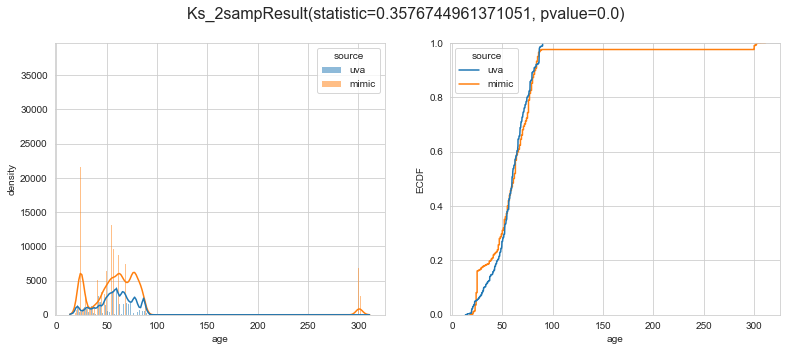

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


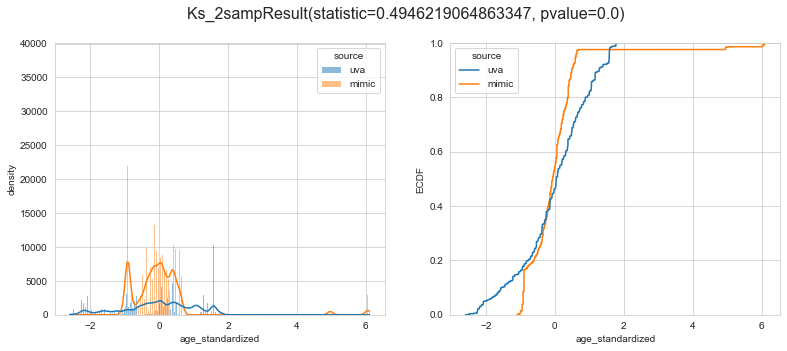

skip non-numeric var: gender
skip non-numeric var: race
skip non-numeric var: ethnicity


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


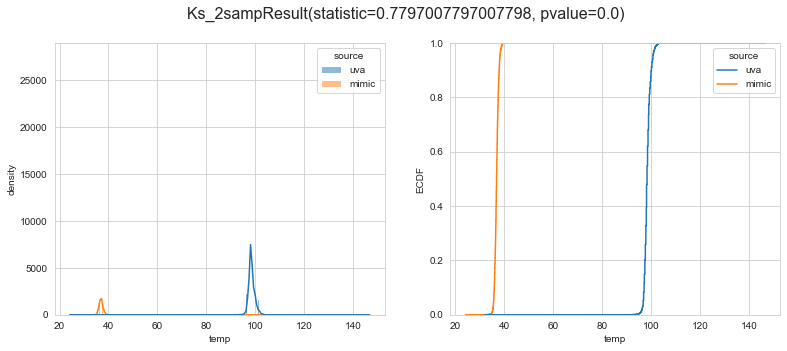

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


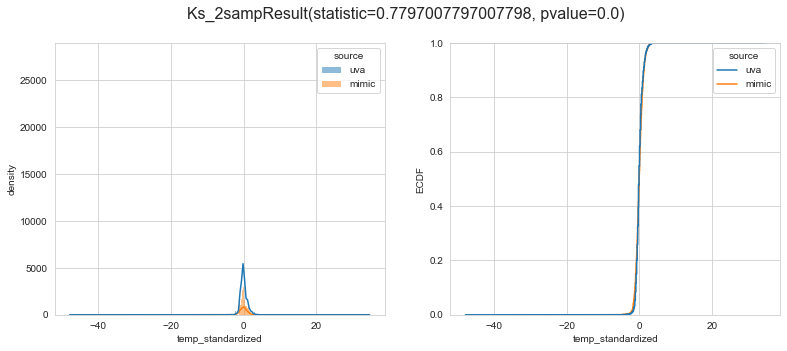

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


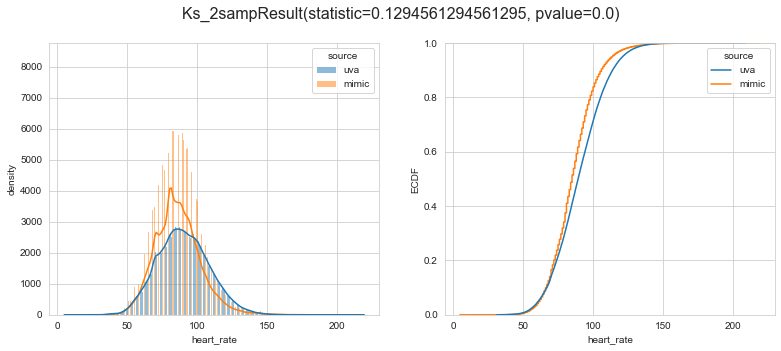

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


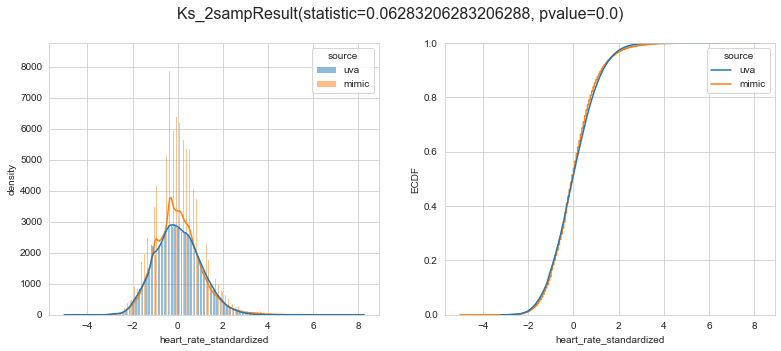

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


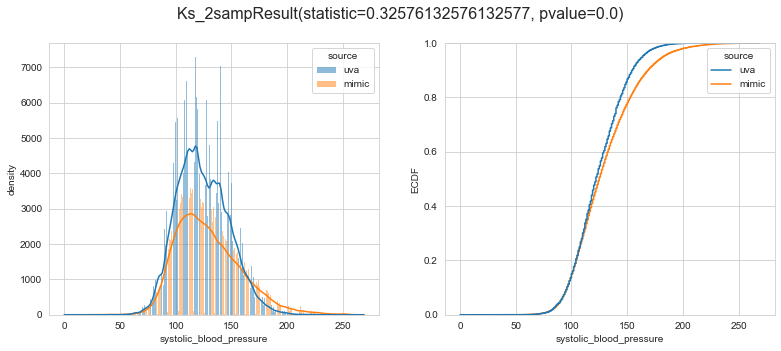

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


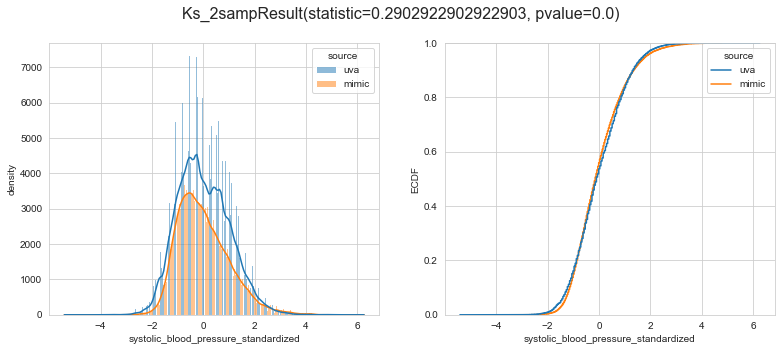

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


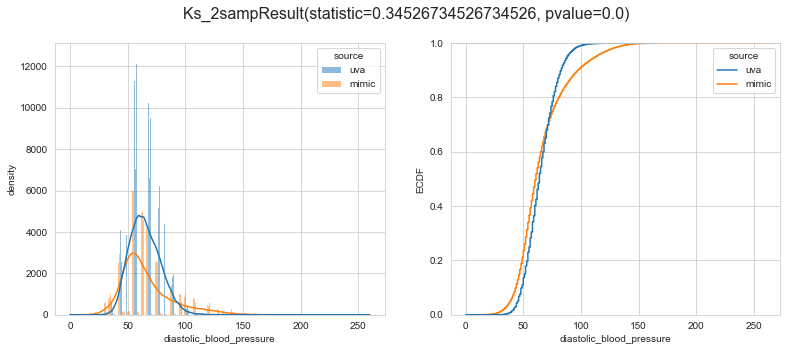

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


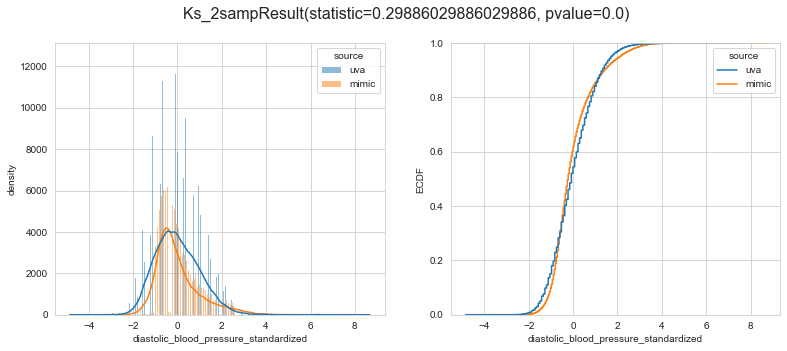

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


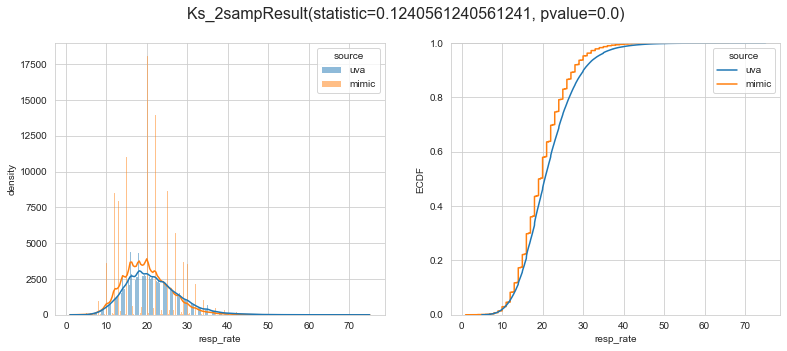

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


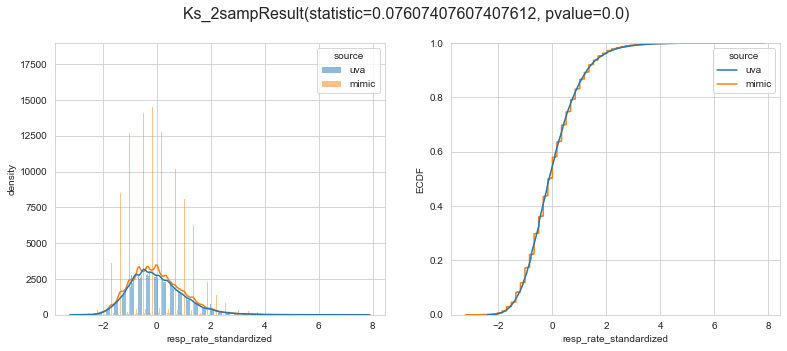

Error comparing var :spo2
'source'


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


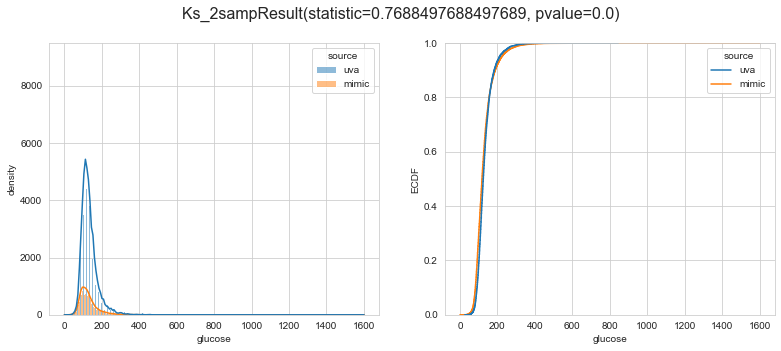

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


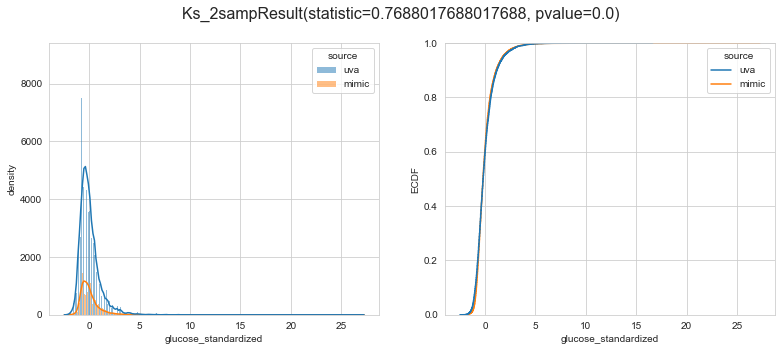

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


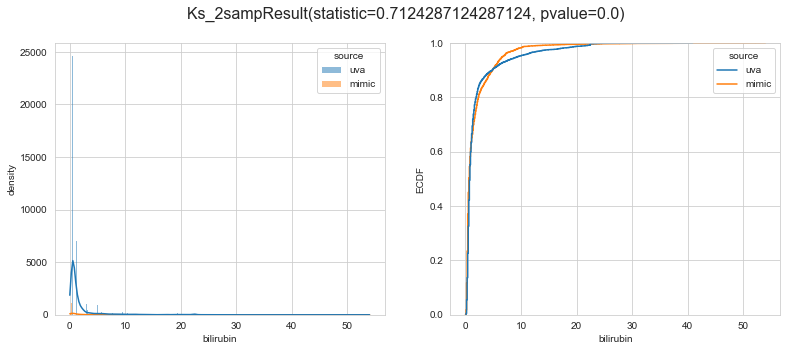

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


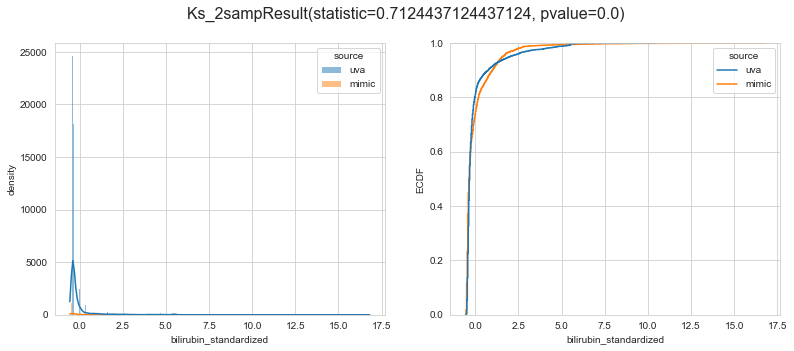

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


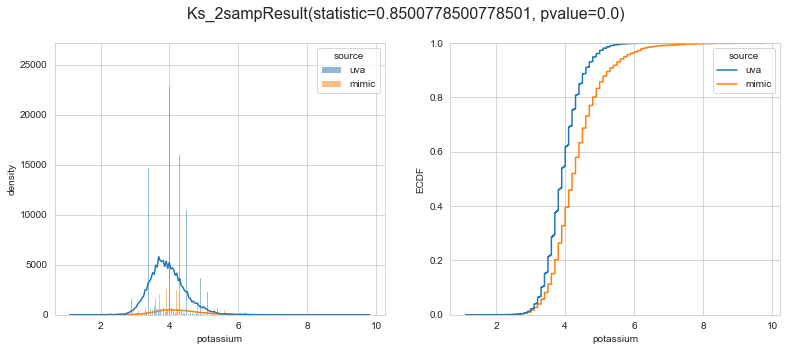

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


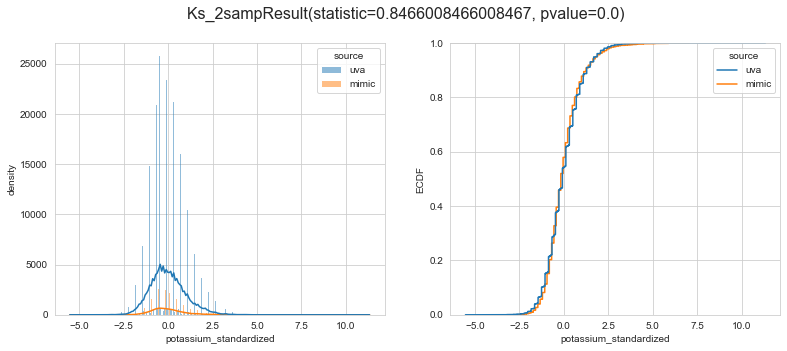

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


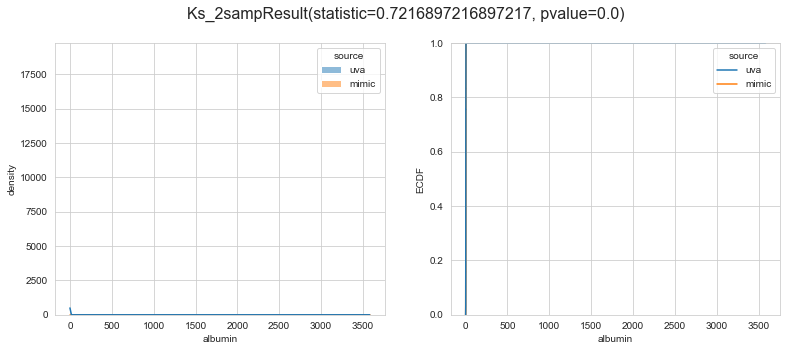

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


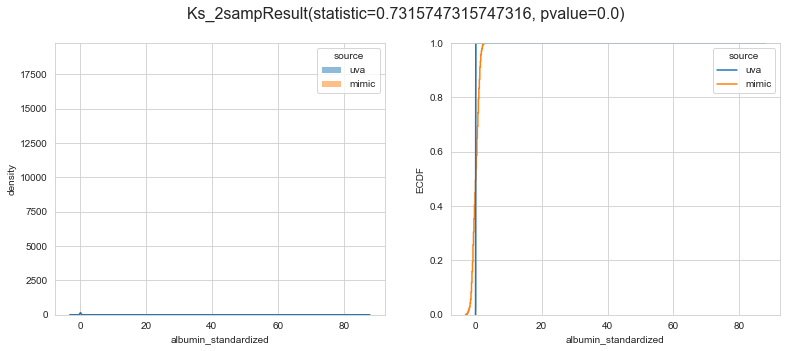

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


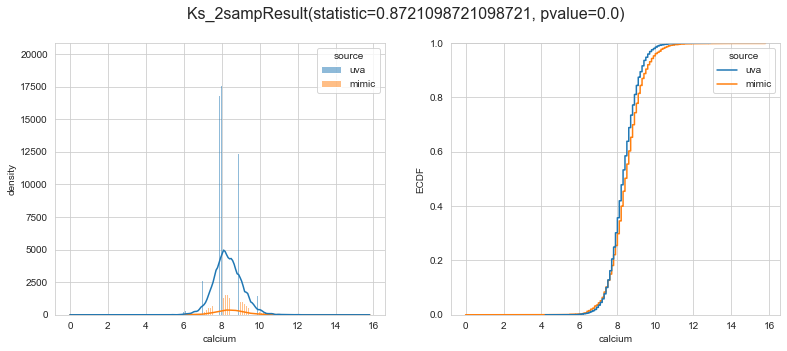

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


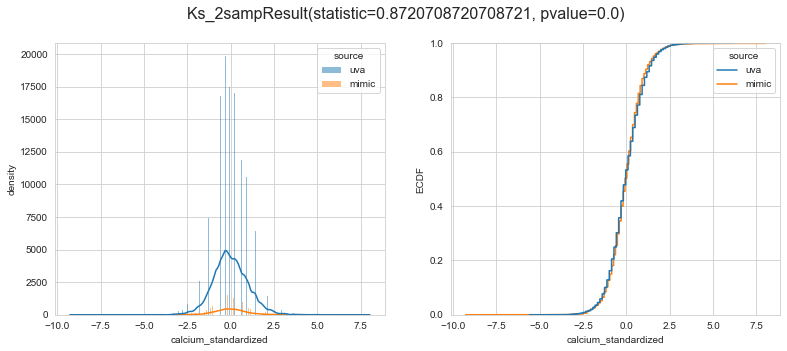

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


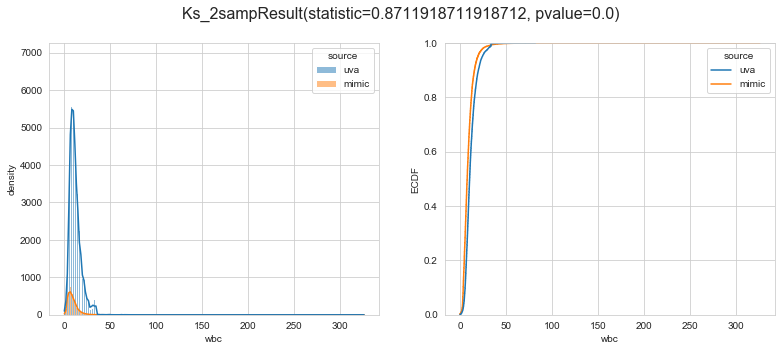

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


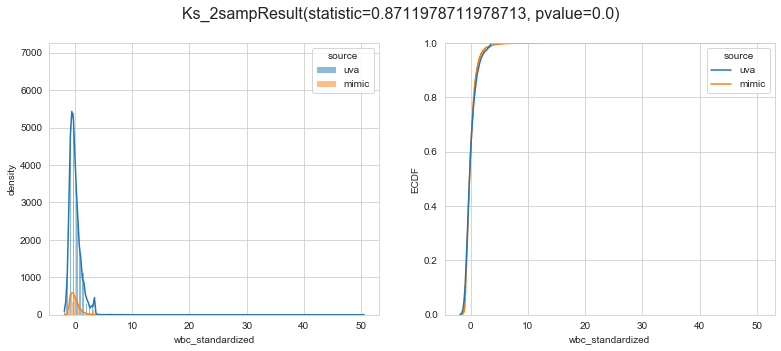

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


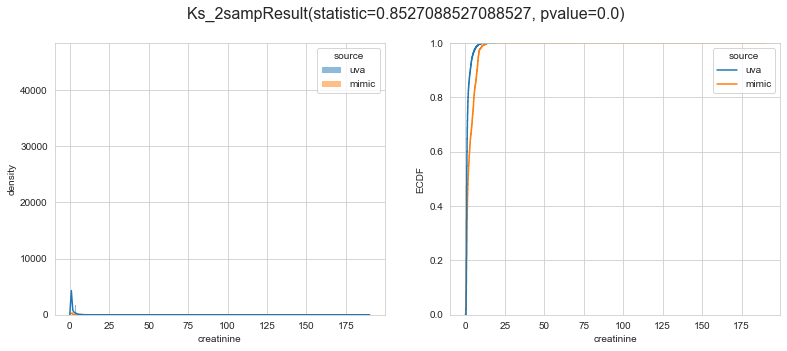

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


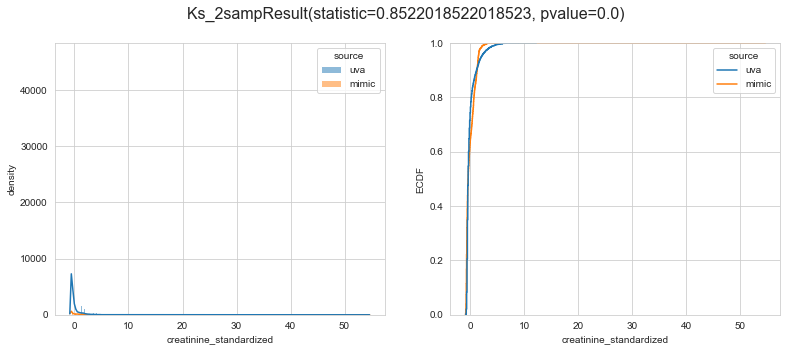

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


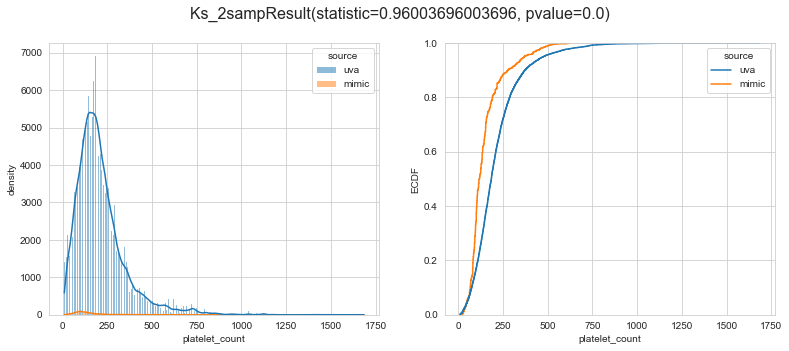

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


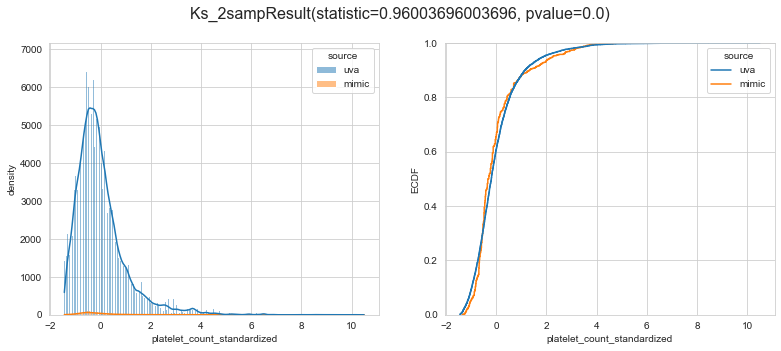

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


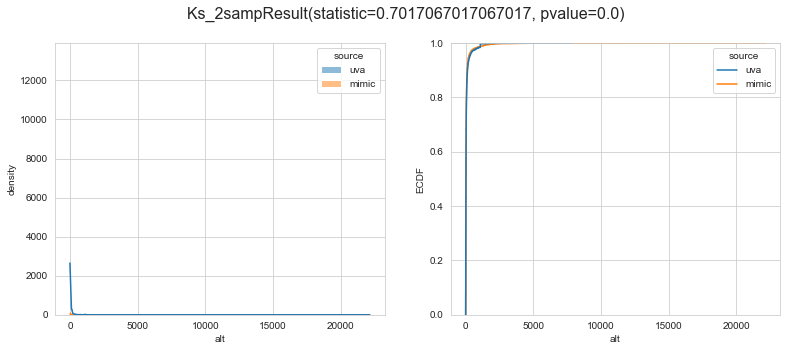

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


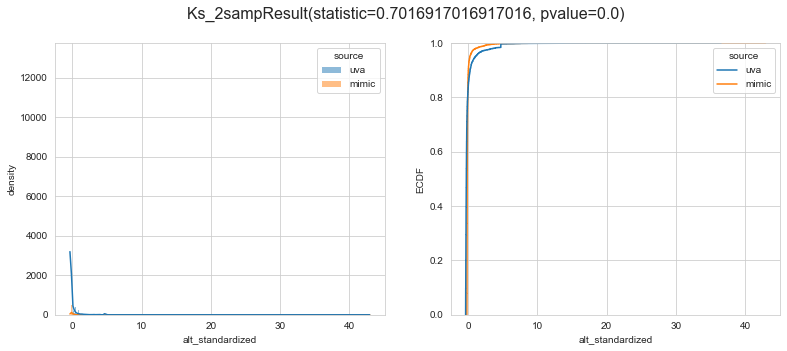

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


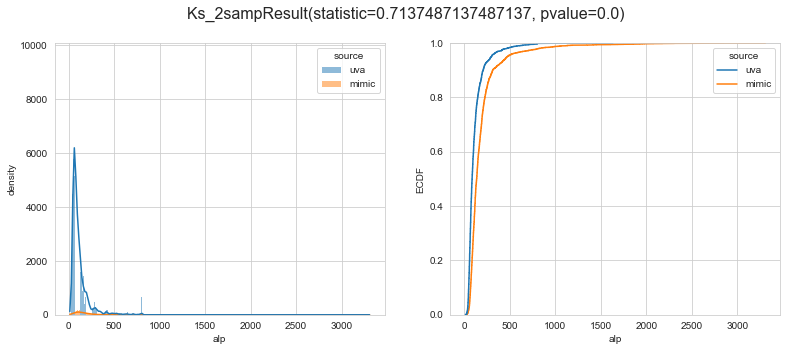

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


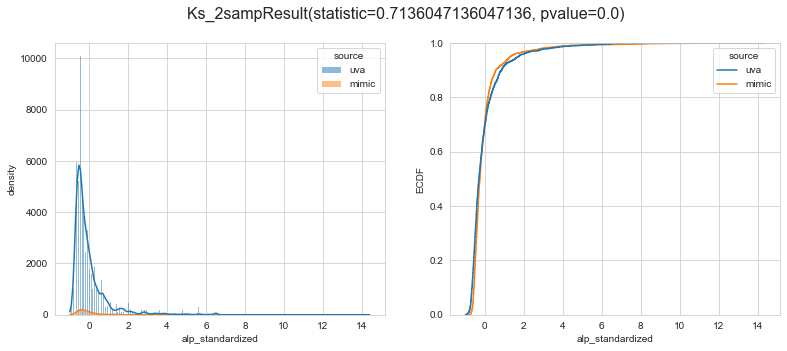

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


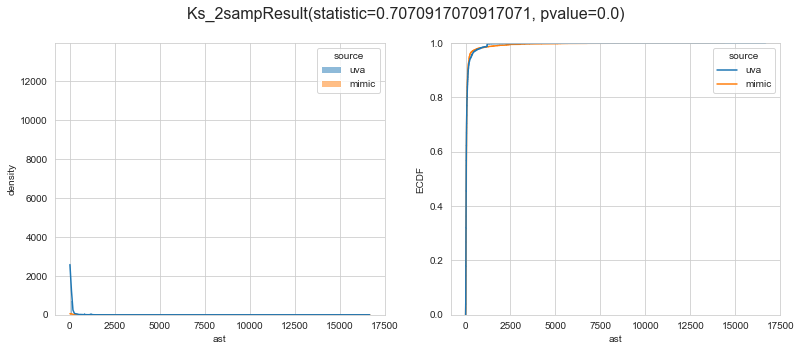

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


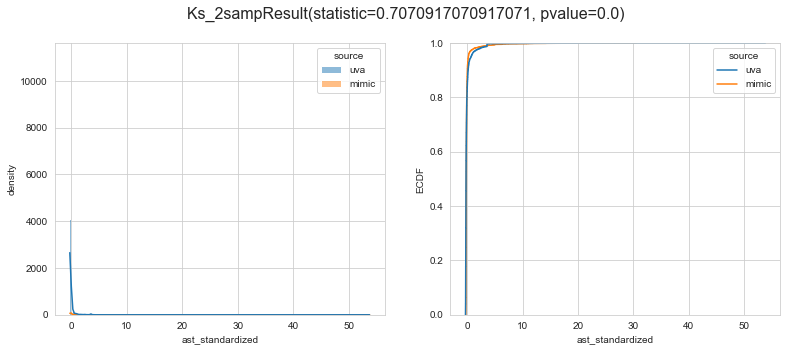

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


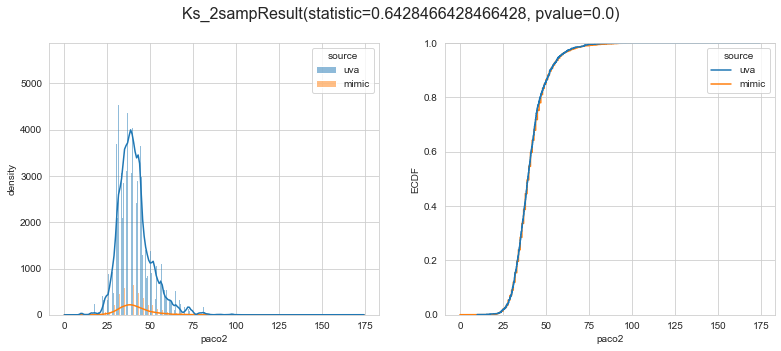

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


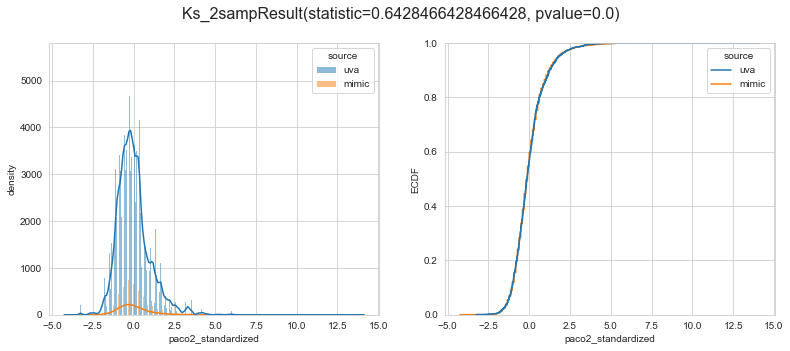

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


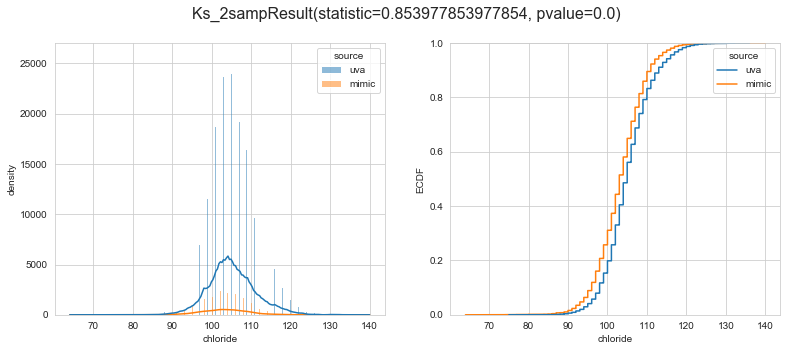

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


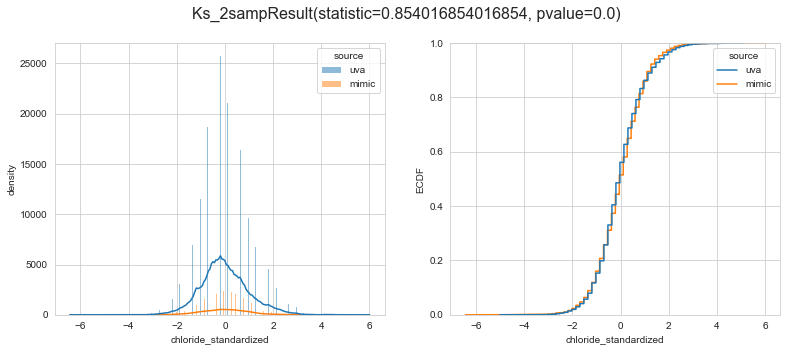

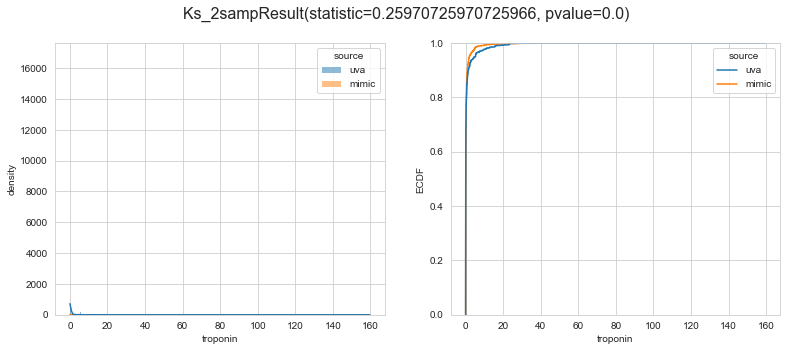

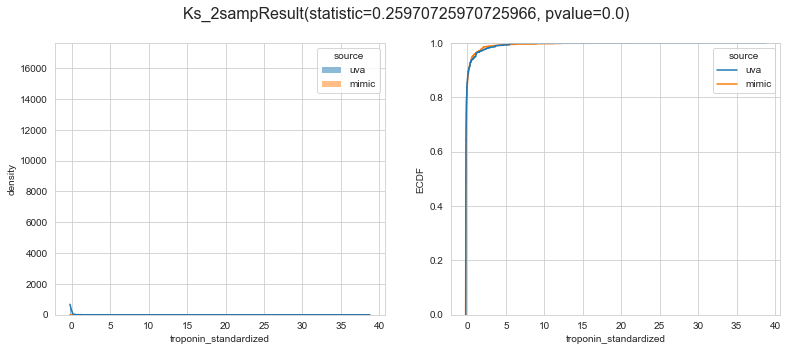

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


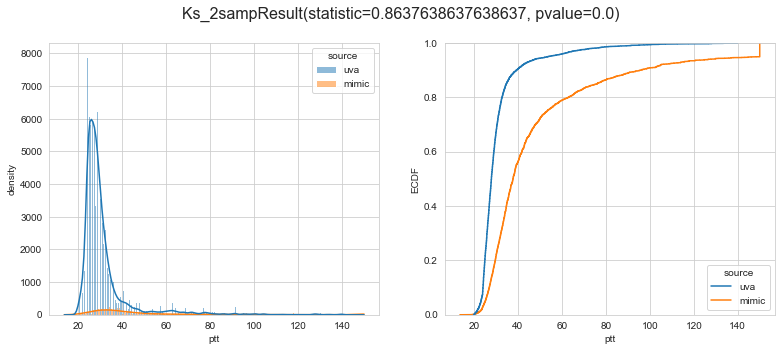

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


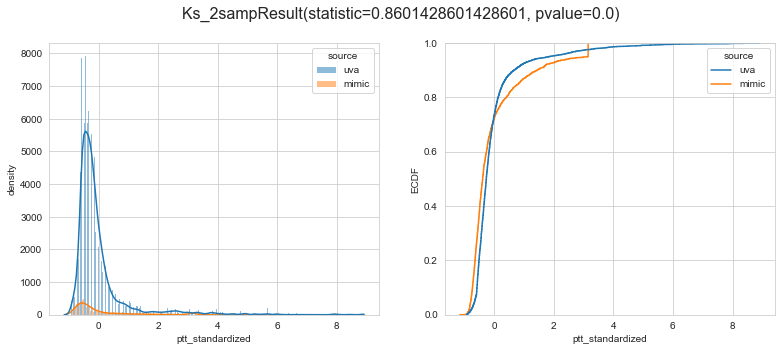

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


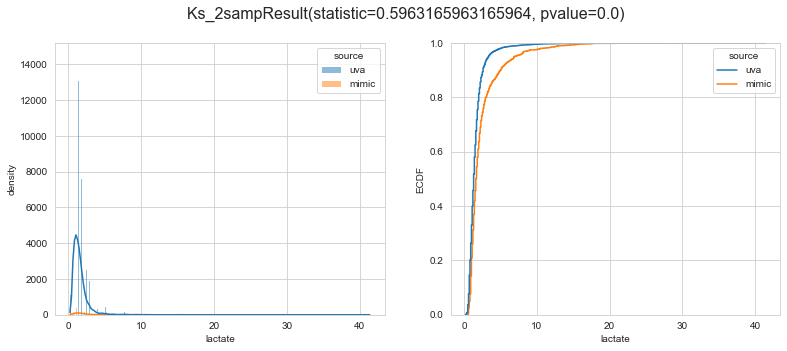

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


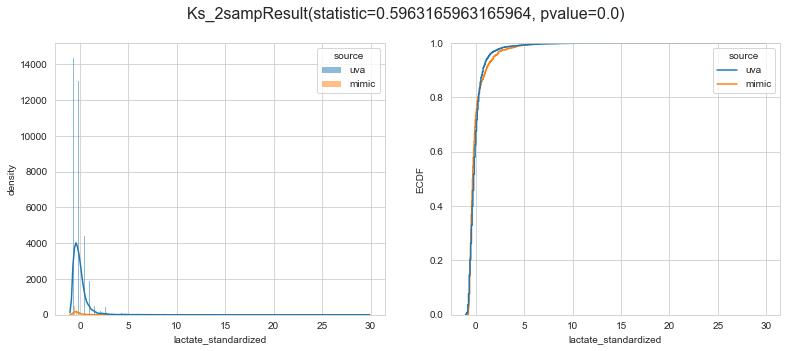

skip non-numeric var: bun


In [4]:
bsi_stream.querier.cmp_src_csv(nrows=333333)

In [13]:
for i, var in enumerate(bsi_stream.engineer.input_vars):
    print(i,var)

0 age___vital
1 age___lab
2 temp___vital
3 heart_rate___vital
4 systolic_blood_pressure___vital
5 diastolic_blood_pressure___vital
6 resp_rate___vital
7 glucose___vital
8 bilirubin___vital
9 potassium___vital
10 albumin___vital
11 calcium___vital
12 wbc___vital
13 creatinine___vital
14 platelet_count___vital
15 alt___vital
16 alp___vital
17 ast___vital
18 paco2___vital
19 chloride___vital
20 troponin___vital
21 ptt___vital
22 lactate___vital
23 bun___vital


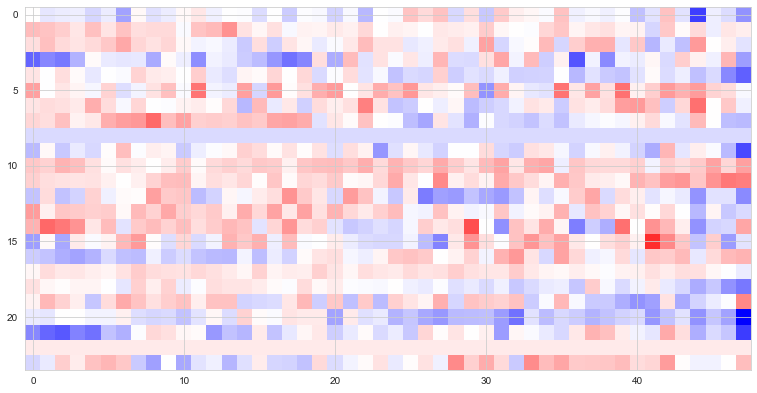

In [31]:
scale = np.max(np.abs(clf.coef_))
nvars = len(bsi_stream.engineer.input_vars)
plt.figure(figsize=(13, 25));
plt.imshow(clf.coef_[0].reshape( int(clf.coef_.shape[1]/nvars), nvars).T, cmap='bwr', vmin=-scale, vmax=scale)


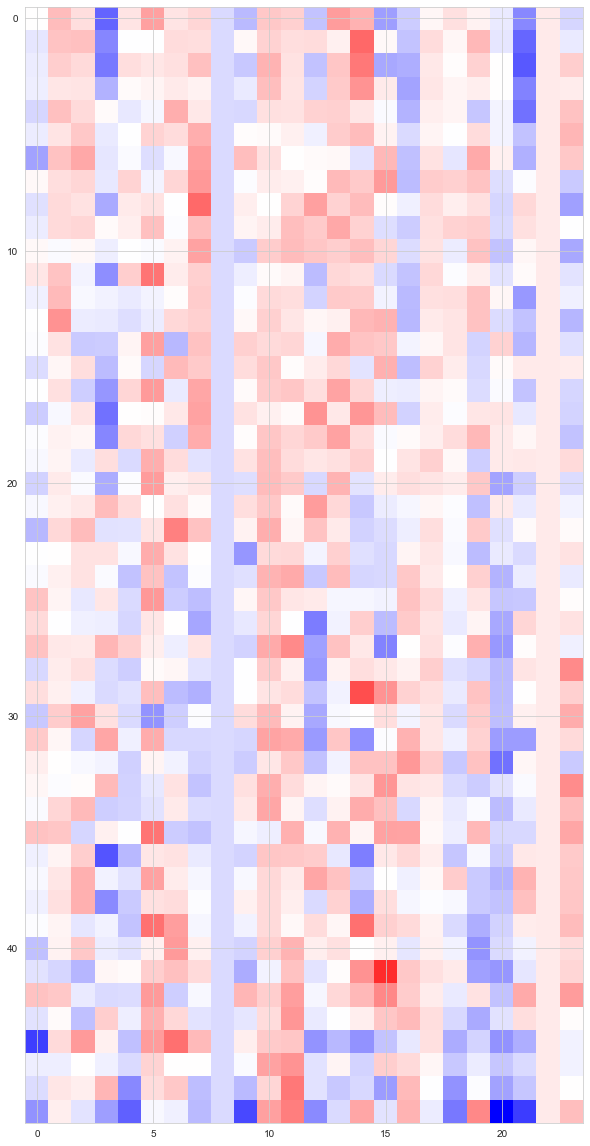

In [33]:
plt.figure(figsize=(10, 25));
plt.imshow(clf.coef_[0].reshape( int(clf.coef_.shape[1]/nvars), nvars), cmap='bwr', vmin=-scale, vmax=scale)


### Summarized Logistic Regression

aggregate 10 days of explan variables to predict pos/neg culture outcome

 
Success! An episode is - 
    - predicting 1 minutes outputs into the future
    - using 14400 minutes long inputs with 0 minutes lag from the last input observation
    - increasing by every 14400 minutes
    - at least 14401 minutes apart from the previous episode
 
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 18.0
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 18.0
--- Standardize temp
--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by nan
--- Fix lower boundary for glucose by nan
--- Fix upper boundary for bilirubin by nan
--- Fix lo

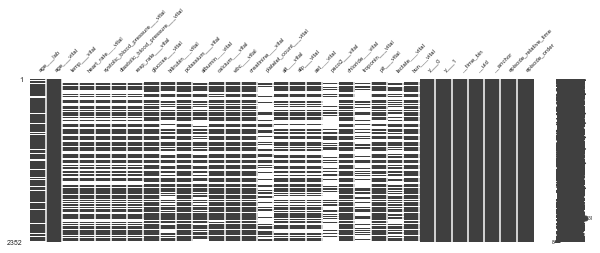

--- Validation MVTS DF missingness before imputation


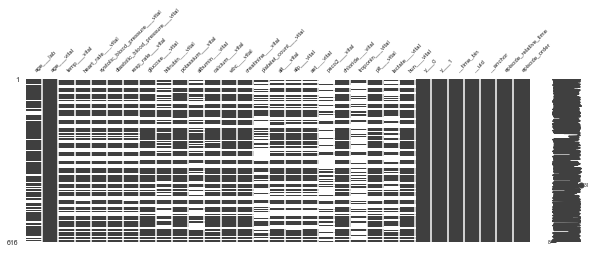

--- Test MVTS DF missingness before imputation


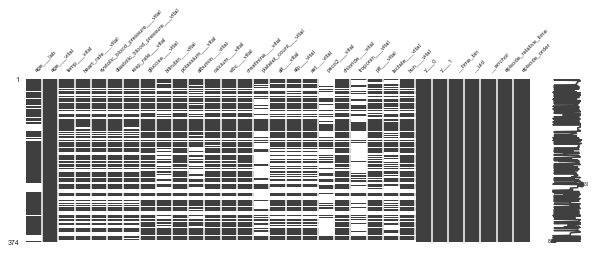

--- Training MVTS DF missingness after imputation


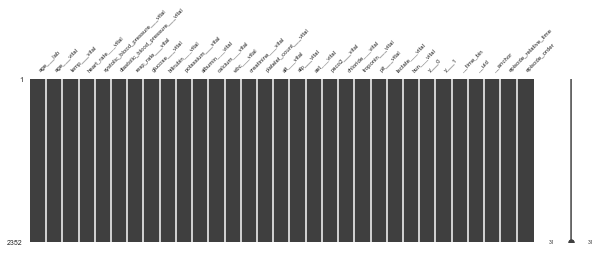

--- Validation MVTS DF missingness after imputation


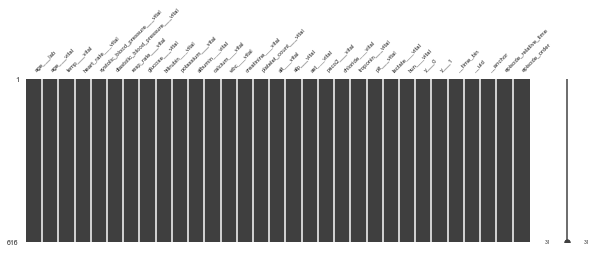

--- Validation MVTS DF missingness after imputation


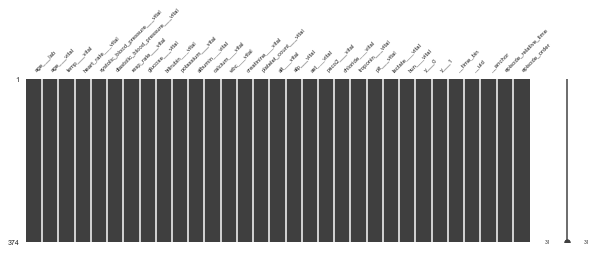

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by 460.0
--- Fix lower boundary for glucose by 49.0
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by 6.6
--- Fix lower boundary for potassium by 2.4
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by nan
--- Fix lower boundary for calcium by nan
--- Fix upper boundary for wbc by 33.85
--- Fix lower boundary for wbc by 0.1
--- Fix upper boundary for creatinine by 10.0
--- Fix lower boundary for creati

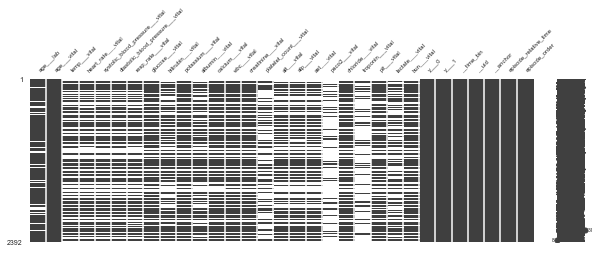

--- Validation MVTS DF missingness before imputation


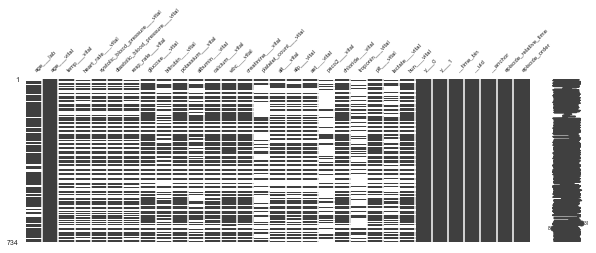

--- Test MVTS DF missingness before imputation


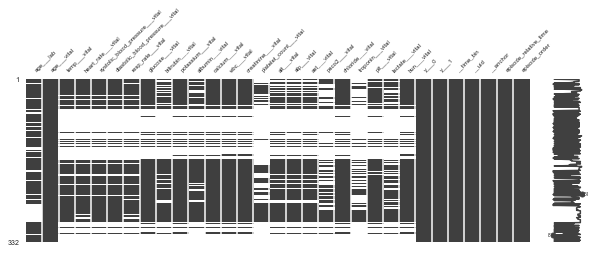

--- Training MVTS DF missingness after imputation


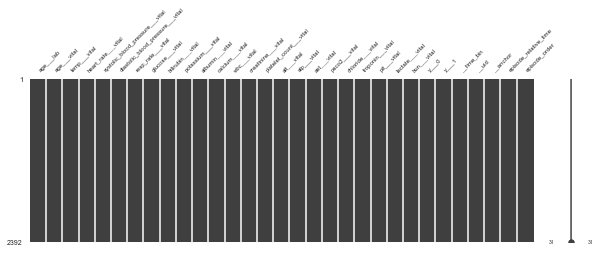

--- Validation MVTS DF missingness after imputation


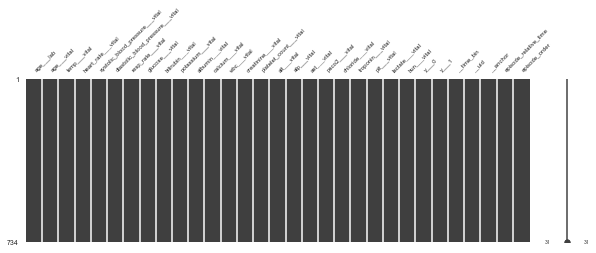

--- Validation MVTS DF missingness after imputation


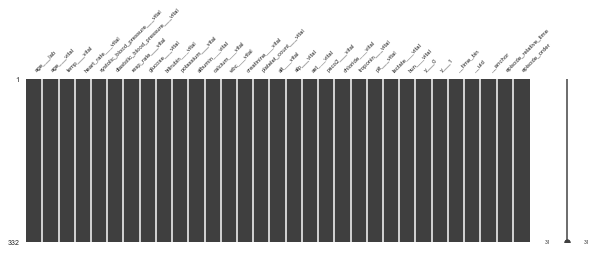

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by 460.0
--- Fix lower boundary for glucose by 49.0
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by 6.6
--- Fix lower boundary for potassium by 2.4
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by 12.0
--- Fix lower boundary for calcium by 6.1
--- Fix upper boundary for wbc by 33.85
--- Fix lower boundary for wbc by 0.0
--- Fix upper boundary for creatinine by 10.0
--- Fix lower boundary for creatinine by 0.0
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan

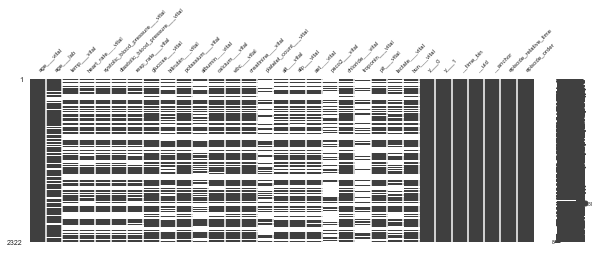

--- Validation MVTS DF missingness before imputation


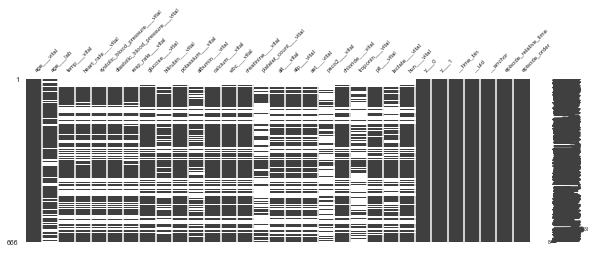

--- Test MVTS DF missingness before imputation


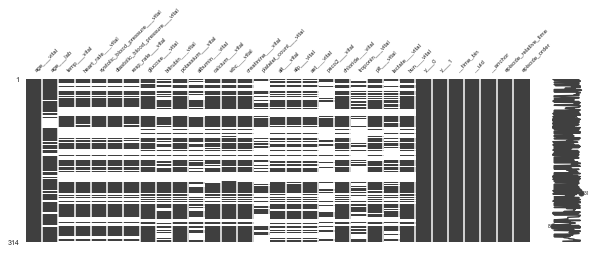

--- Training MVTS DF missingness after imputation


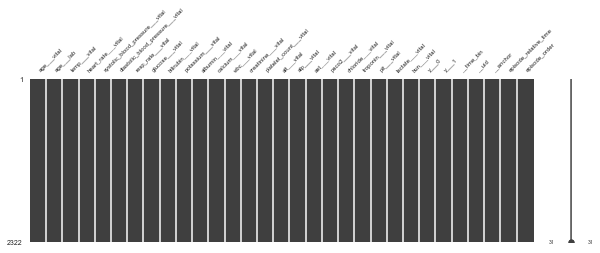

--- Validation MVTS DF missingness after imputation


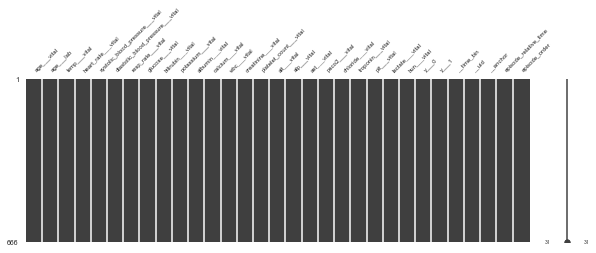

--- Validation MVTS DF missingness after imputation


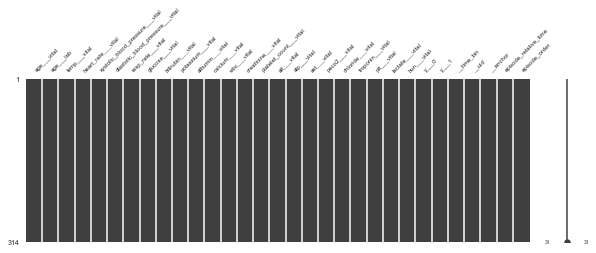

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by 6.6
--- Fix lower boundary for potassium by 2.4
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by 12.0
--- Fix lower boundary for calcium by 6.1
--- Fix upper boundary for wbc by 33.85
--- Fix lower boundary for wbc by 0.0
--- Fix upper boundary for creatinine by 10.0
--- Fix lower boundary for creatinine by 0.0
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan
--- Fix lower boundary for alt by nan
--- Fix upper boundary for alp by nan
--- Fix lower boundary for alp by nan
--- Fix upper boundary for ast by nan
--- Fix lower boundary for ast by nan
--- Fix upper boundary for paco2 by nan
--- Fix lower boundary for paco2 by nan
--- Fix upper boundary for chloride by 132.0
--- Fix lower boundary for chloride

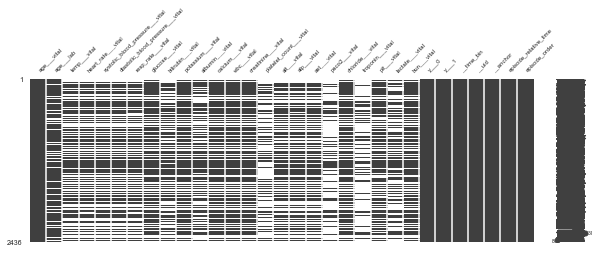

--- Validation MVTS DF missingness before imputation


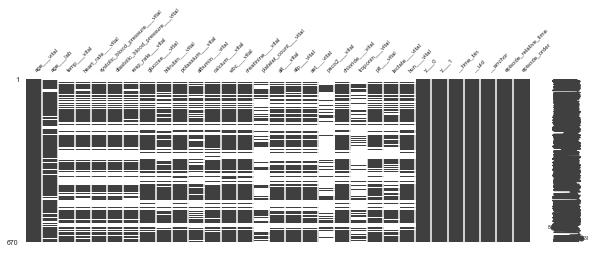

--- Test MVTS DF missingness before imputation


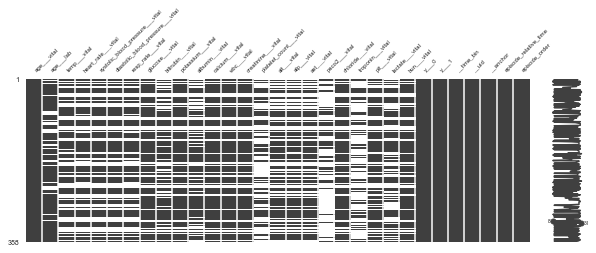

--- Training MVTS DF missingness after imputation


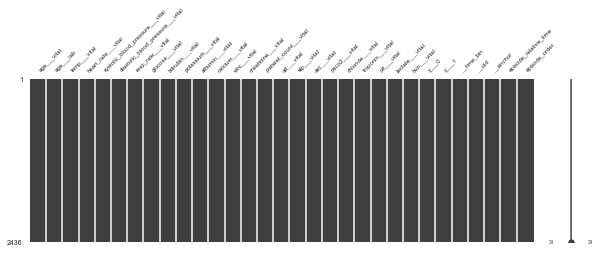

--- Validation MVTS DF missingness after imputation


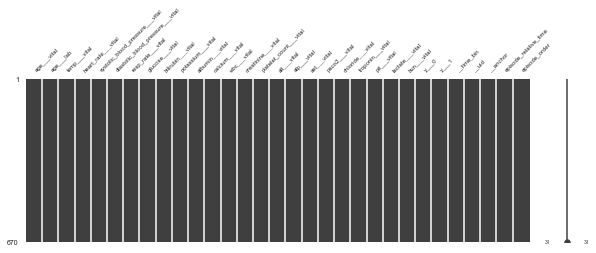

--- Validation MVTS DF missingness after imputation


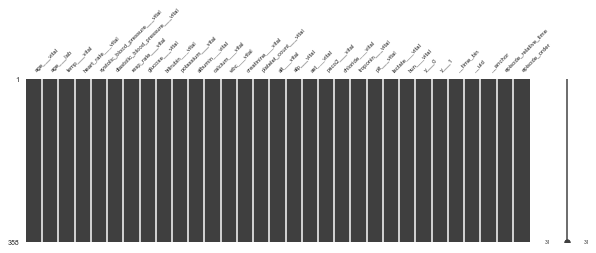

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

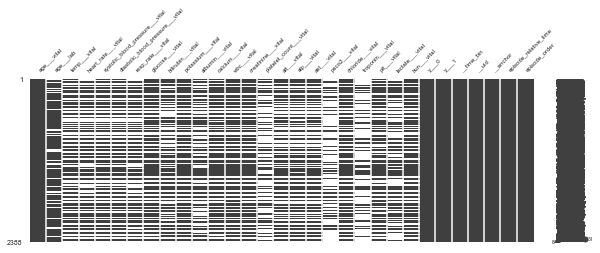

--- Validation MVTS DF missingness before imputation


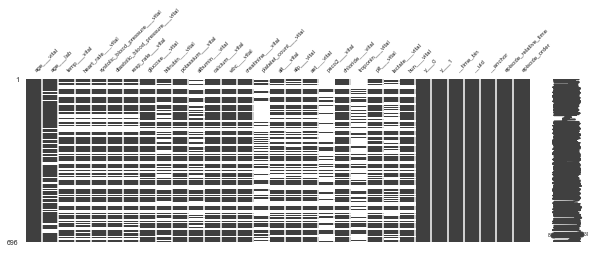

--- Test MVTS DF missingness before imputation


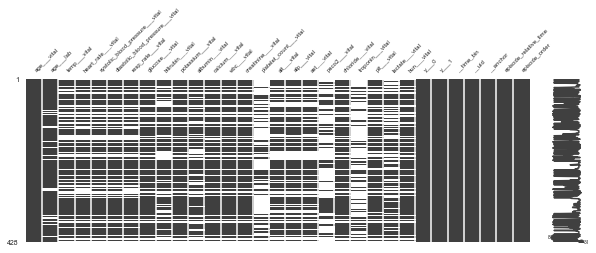

--- Training MVTS DF missingness after imputation


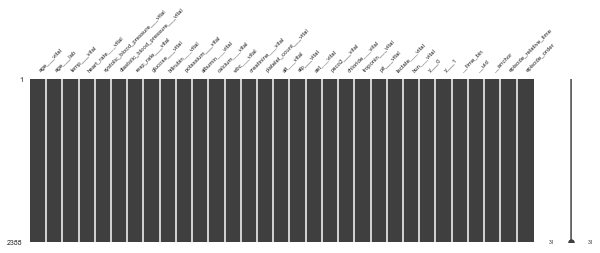

--- Validation MVTS DF missingness after imputation


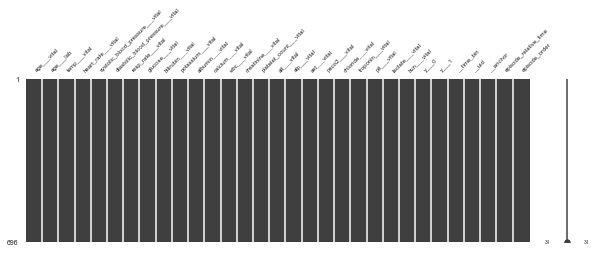

--- Validation MVTS DF missingness after imputation


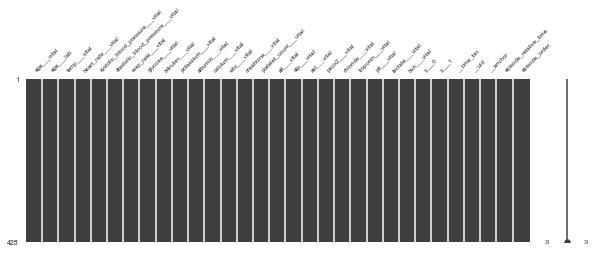

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

38/38 [==============================] - 0s 7ms/step - loss: 0.9646 - val_loss: 0.9280
Epoch 62/100
38/38 [==============================] - 0s 7ms/step - loss: 0.9755 - val_loss: 0.9007
Epoch 63/100
38/38 [==============================] - 0s 7ms/step - loss: 0.9544 - val_loss: 0.9929
Epoch 64/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0319 - val_loss: 0.8806
Epoch 65/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0696 - val_loss: 0.8656
Epoch 66/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0026 - val_loss: 0.9598
Epoch 67/100
38/38 [==============================] - 0s 7ms/step - loss: 0.9221 - val_loss: 0.8676
Epoch 68/100
38/38 [==============================] - 0s 7ms/step - loss: 0.9985 - val_loss: 1.0042
Epoch 69/100
38/38 [==============================] - 0s 7ms/step - loss: 0.9198 - val_loss: 0.8102
Epoch 70/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0018 - val_loss: 0.8432
Epoch 71/100


38/38 [==============================] - 0s 7ms/step - loss: 0.5316 - val_loss: 0.5509
Epoch 45/100
38/38 [==============================] - 0s 7ms/step - loss: 0.5316 - val_loss: 0.5510
Epoch 46/100
38/38 [==============================] - 0s 7ms/step - loss: 0.5316 - val_loss: 0.5510
Epoch 47/100
38/38 [==============================] - 0s 7ms/step - loss: 0.5316 - val_loss: 0.5509
Epoch 48/100
38/38 [==============================] - 0s 7ms/step - loss: 0.5315 - val_loss: 0.5511
Epoch 49/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5315 - val_loss: 0.5511
Epoch 50/100
38/38 [==============================] - 0s 6ms/step - loss: 0.5315 - val_loss: 0.5511
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
c

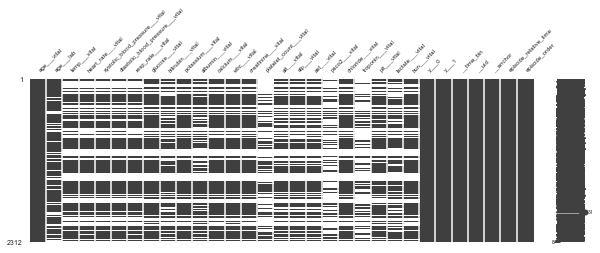

--- Validation MVTS DF missingness before imputation


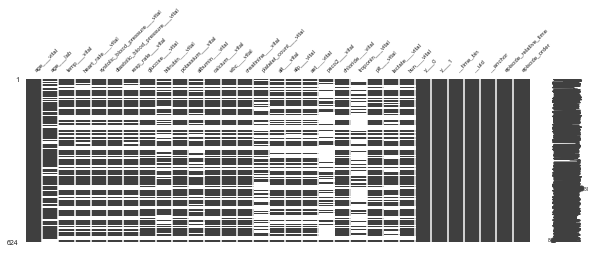

--- Test MVTS DF missingness before imputation


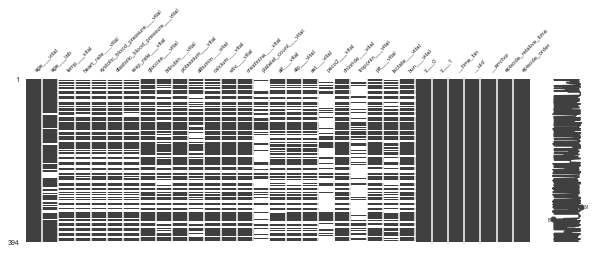

--- Training MVTS DF missingness after imputation


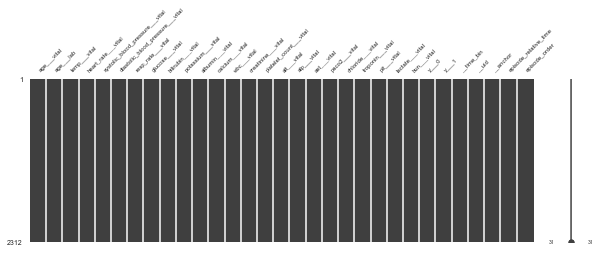

--- Validation MVTS DF missingness after imputation


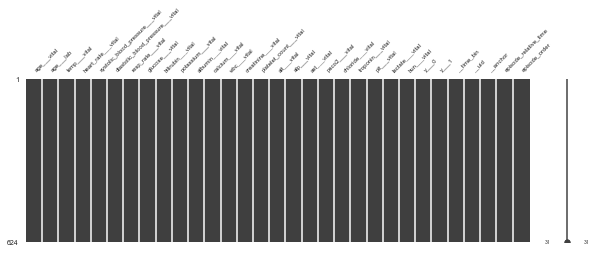

--- Validation MVTS DF missingness after imputation


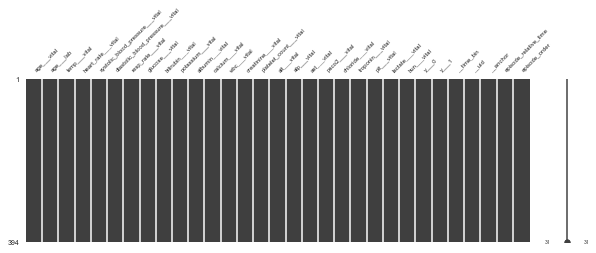

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

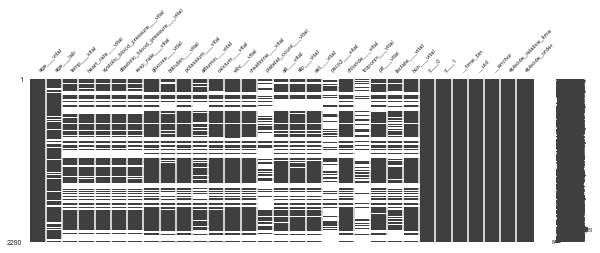

--- Validation MVTS DF missingness before imputation


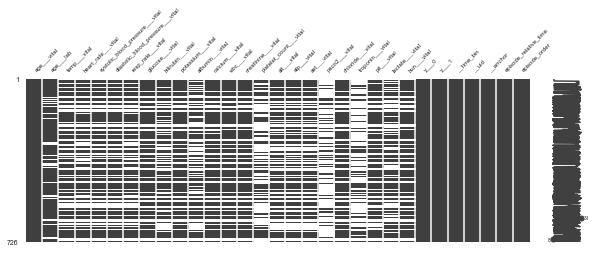

--- Test MVTS DF missingness before imputation


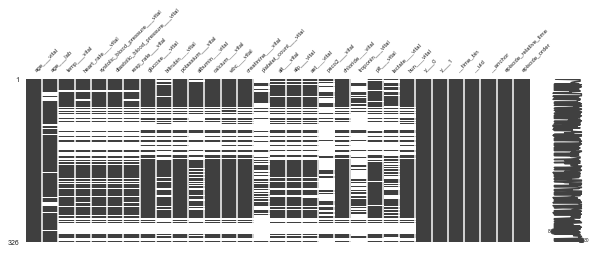

--- Training MVTS DF missingness after imputation


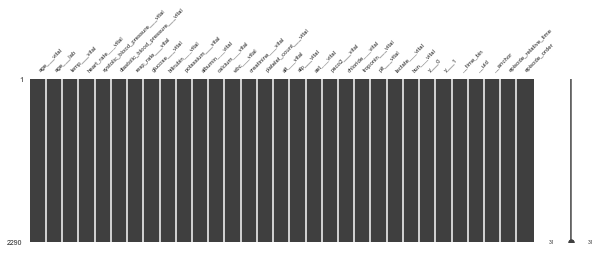

--- Validation MVTS DF missingness after imputation


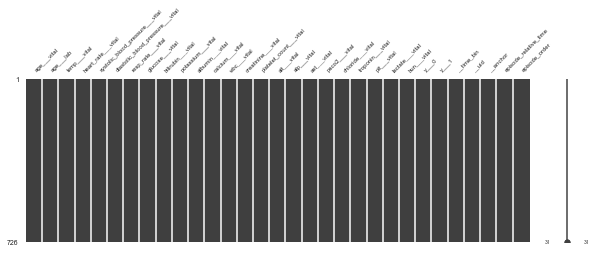

--- Validation MVTS DF missingness after imputation


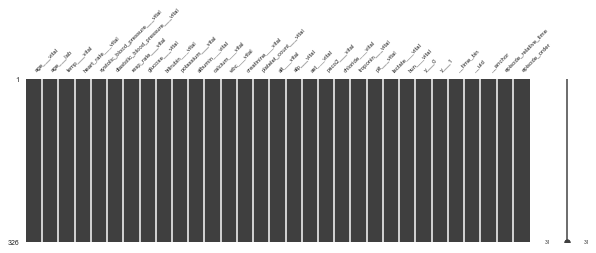

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 14/100
36/36 [==============================] - 0s 5ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 15/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 16/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 17/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 18/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 19/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 20/100
36/36 [==============================] - 0s 6ms/step - loss: 14.7104 - val_loss: 14.6528
Epoch 21/100
36/36 [==============================] - 0s 5ms/step - loss: 14.7104 - val_loss: 14.6528
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of 

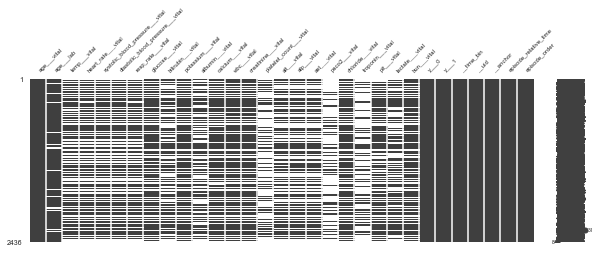

--- Validation MVTS DF missingness before imputation


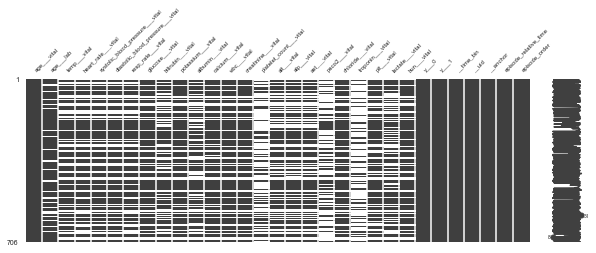

--- Test MVTS DF missingness before imputation


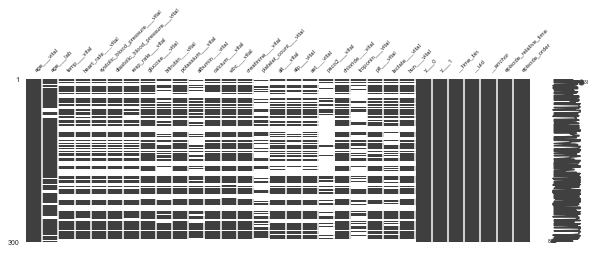

--- Training MVTS DF missingness after imputation


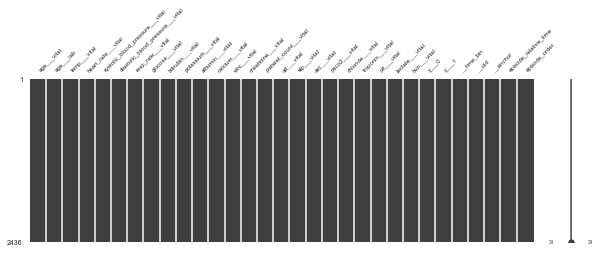

--- Validation MVTS DF missingness after imputation


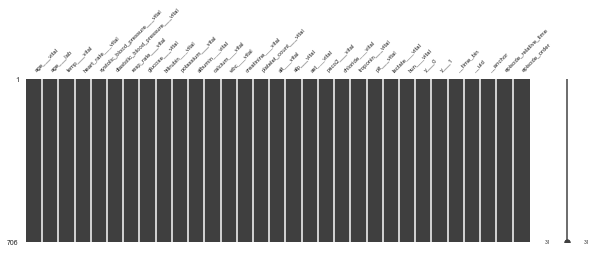

--- Validation MVTS DF missingness after imputation


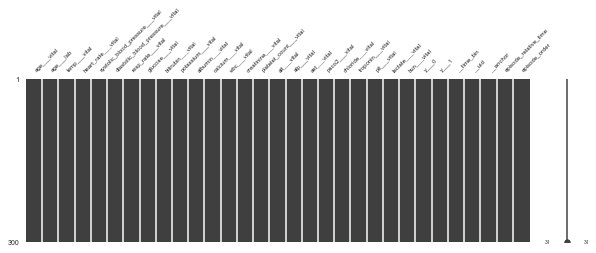

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by nan
--- Fix lower boundary for glucose by nan
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- Fix lower boundary for potassium by nan
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by nan
--- Fix lower boundary for calcium by nan
--- Fix upper boundary for wbc by nan
--- Fix lower boundary for wbc by nan
--- Fix upper boundary for creatinine by nan
--- Fix lower boundary for creatinine by nan
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan
--- Fix lower boundary for alt by nan
--- Fix upper boundary for alp by nan
--- Fix lower boundary for alp by nan
--- Fix upper boundary for ast by nan
--- Fix lower boundary for ast by nan
--- Fix upper boundary for paco2 by 

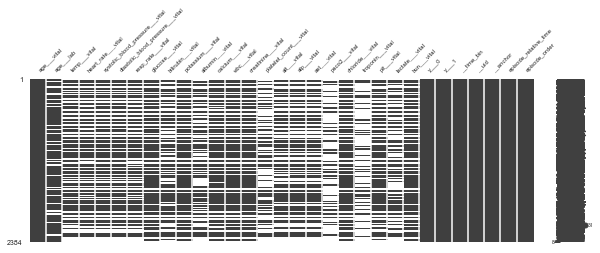

--- Validation MVTS DF missingness before imputation


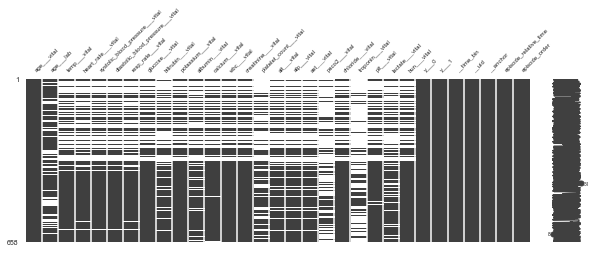

--- Test MVTS DF missingness before imputation


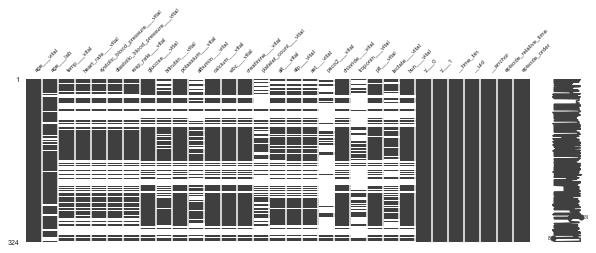

--- Training MVTS DF missingness after imputation


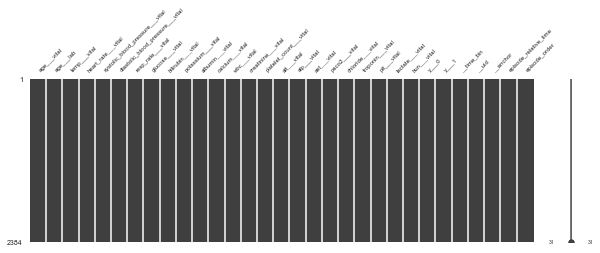

--- Validation MVTS DF missingness after imputation


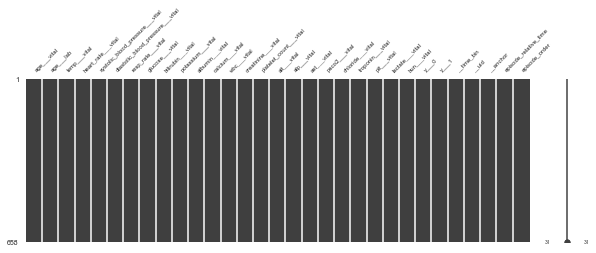

--- Validation MVTS DF missingness after imputation


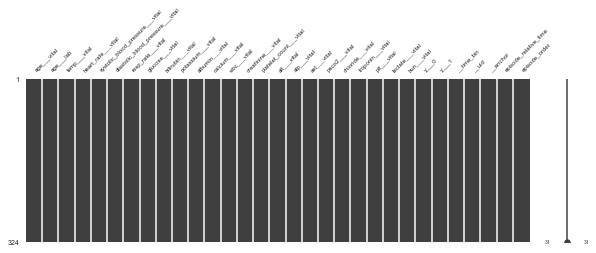

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

38/38 [==============================] - 0s 6ms/step - loss: 0.3848 - val_loss: 0.5543
Epoch 62/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4122 - val_loss: 0.5854
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3869 - val_loss: 0.4057
Epoch 64/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4195 - val_loss: 0.4566
Epoch 65/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4090 - val_loss: 0.4322
Epoch 66/100
38/38 [==============================] - 0s 6ms/step - loss: 0.3786 - val_loss: 0.3985
Epoch 67/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4226 - val_loss: 0.3675
Epoch 68/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4542 - val_loss: 0.4004
Epoch 69/100
38/38 [==============================] - 0s 8ms/step - loss: 0.4014 - val_loss: 0.3827
Epoch 70/100
38/38 [==============================] - 0s 7ms/step - loss: 0.4056 - val_loss: 0.3648
Epoch 71/100


--- Fix lower boundary for bun by nan
--- Fix order of level: y___0
Success! Engineer has new attributes mvts_df, input_vars, output_vars. 
Success! Engineer has 3 new attributes train_df, valid_df and test_df. 
--- Training MVTS DF missingness before imputation


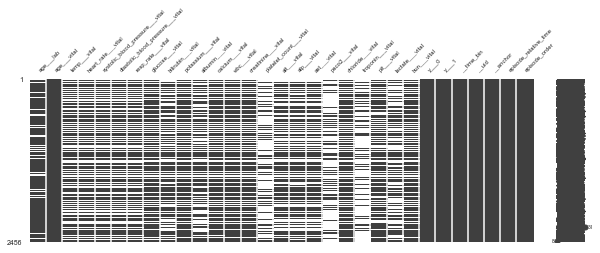

--- Validation MVTS DF missingness before imputation


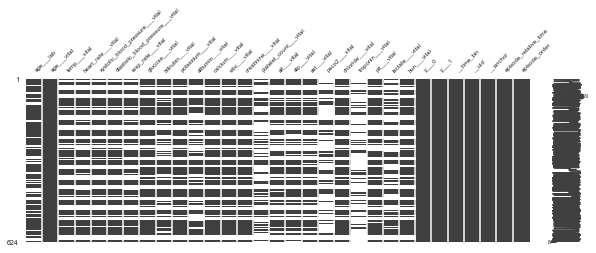

--- Test MVTS DF missingness before imputation


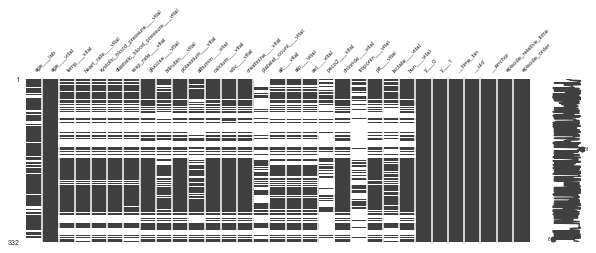

--- Training MVTS DF missingness after imputation


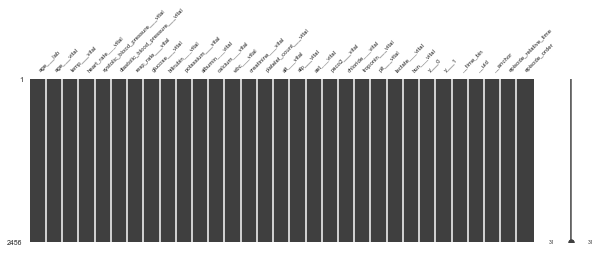

--- Validation MVTS DF missingness after imputation


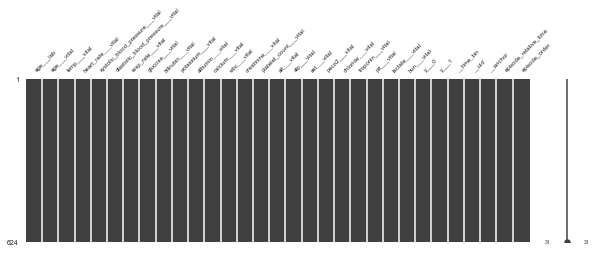

--- Validation MVTS DF missingness after imputation


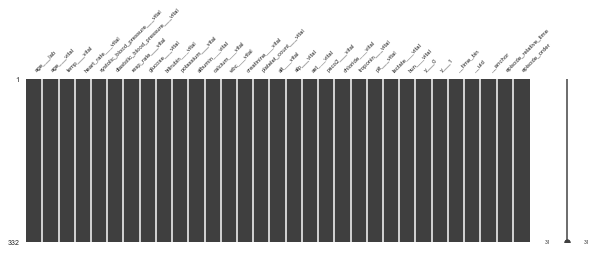

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0858
Epoch 47/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0857
Epoch 48/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0856
Epoch 49/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0854
Epoch 50/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0853
Epoch 51/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0852
Epoch 52/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0850
Epoch 53/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0849
Epoch 54/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0847
Epoch 55/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0846
Epoch 56/100


39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0750
Epoch 11/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0750
Epoch 12/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0750
Epoch 13/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0750
Epoch 14/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 15/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 16/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 17/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 18/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 19/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0749
Epoch 20/100


39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0737
Epoch 93/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0737
Epoch 94/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0736
Epoch 95/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0736
Epoch 96/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0736
Epoch 97/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0736
Epoch 98/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0735
Epoch 99/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0735
Epoch 100/100
39/39 [==============================] - 0s 5ms/step - loss: 1.3782 - val_loss: 1.0735
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of testing tfds shap

In [4]:
# define the episode
bsi_stream.engineer.DefineEpisode(input_time_len=2*24*60, output_time_len=1, time_resolution=60, time_lag=0, anchor_gap=None)

# regression evaluation
eval_mtrx_folds = pd.DataFrame()
coef = []

# all subjects
for i in range(10):
    
    train_df, valid_df, test_df, train_tfds, valid_tfds, test_tfds = bsi_stream.engineer.BuildMVTS(csv_pool_path, nsbj=1000, valid_frac=0.2, test_frac=0.1, batch_size=32, impute_input='median', impute_output='median', return_data=True)
    
    eval_df_trace = pd.DataFrame()
    keras.backend.clear_session()
    input_shape = list(train_tfds.element_spec[0].shape)[1:3]
    mdl = keras.models.Sequential([
        keras.Input(shape=input_shape),
        keras.layers.Dense(2, activation='softmax'),
        keras.layers.Reshape([1, -1]),
    ])
    mdl.summary()

    # compile and run the model
    mdl.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=1e-3))
    callback = EarlyStopping(monitor='val_loss', patience=10)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    
    y, y_pred, eval_mtrx = bsi_stream.reporter.eval_mtrx_tfds(test_tfds, mdl)
    eval_mtrx['fold'] = i+1

    eval_mtrx_folds = pd.concat([eval_mtrx_folds, eval_mtrx],sort=False)
    coef.append(list(mdl.layers[0].kernel[:,0].numpy()))
    

In [5]:
eval_mtrx_folds

response       auc         r2  fold
0  variable 1  0.500000  -0.038889     1
1  variable 2  0.463889  -0.038889     1
0  variable 1  0.496732  -0.168426     2
1  variable 2  0.515334  -0.168426     2
0  variable 1  0.500000  -0.082759     3
1  variable 2  0.594253  -0.082759     3
0  variable 1  0.533333  -0.018699     4
1  variable 2  0.530081  -0.018699     4
0  variable 1  0.608360  -0.406754     5
1  variable 2  0.608466  -0.406754     5
0  variable 1  0.510495  -0.230635     6
1  variable 2  0.504873  -0.230635     6
0  variable 1  0.468975 -17.111111     7
1  variable 2  0.500000 -17.111110     7
0  variable 1  0.550827 -15.666667     8
1  variable 2  0.500000 -15.666667     8
0  variable 1  0.530501  -0.130978     9
1  variable 2  0.530501  -0.130978     9
0  variable 1  0.496815  -0.174805    10
1  variable 2  0.366596  -0.174805    10

In [8]:
y_pred[:,0]+y_pred[:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

By bootstraping, we can have a set coefficients each time we train the model. By plotting coefficients' histograms, we can esttimated the coefficients distribution and confidence interval. 

### RNN - LSTM


 
Success! An episode is - 
    - predicting 1 minutes outputs into the future
    - using 10080 minutes long inputs with 0 minutes lag from the last input observation
    - increasing by every 60 minutes
    - at least 10081 minutes apart from the previous episode
 
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 19.0
--- Standardize temp
--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by 460.0
--- Fix lower boundary for glucose by 49.0
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by 6.6
-

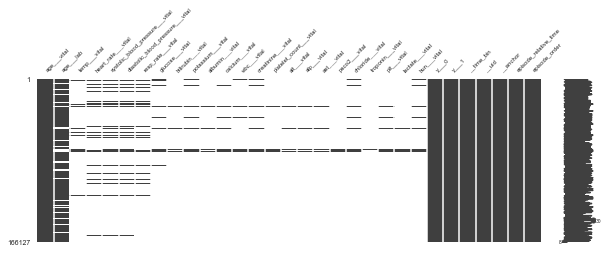

--- Validation MVTS DF missingness before imputation


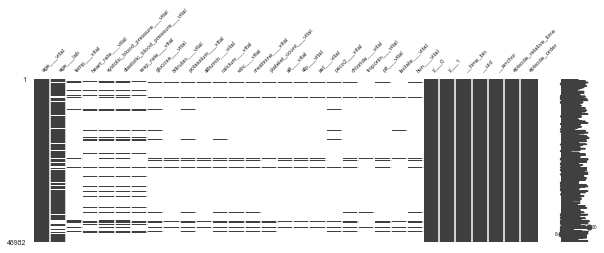

--- Test MVTS DF missingness before imputation


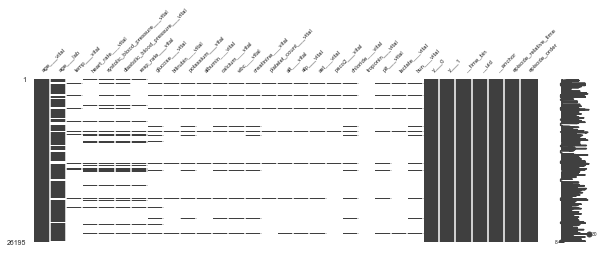

--- Training MVTS DF missingness after imputation


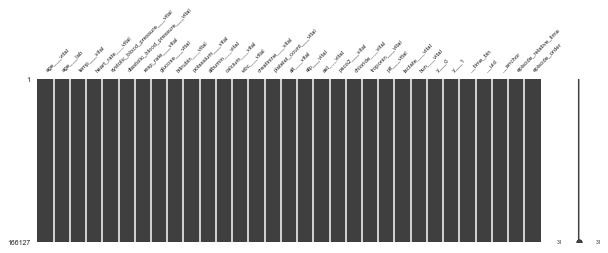

--- Validation MVTS DF missingness after imputation


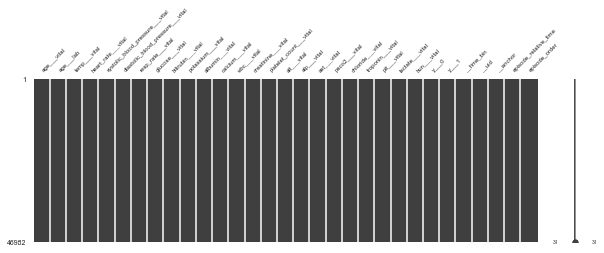

--- Validation MVTS DF missingness after imputation


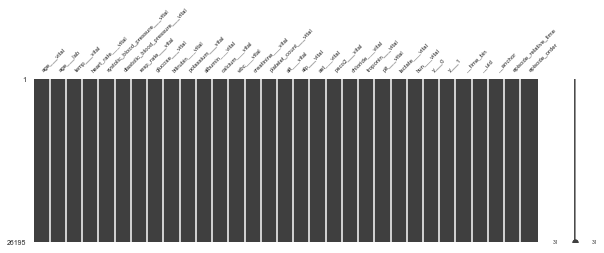

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by 68.0
--- Fix lower boundary for resp_rate by 1.0
--- Fix upper boundary for glucose by nan
--- Fix lower boundary for glucose by nan
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- Fix lower boundary for potassium by nan
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by nan
--- Fix lower boundary for calcium by nan
--- Fix upper boundary for wbc by nan
--- Fix lower boundary for wbc by nan
--- Fix upper boundary for creatinine by nan
--- Fix lower boundary for creatinine 

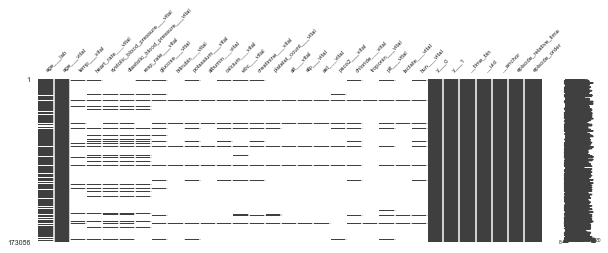

--- Validation MVTS DF missingness before imputation


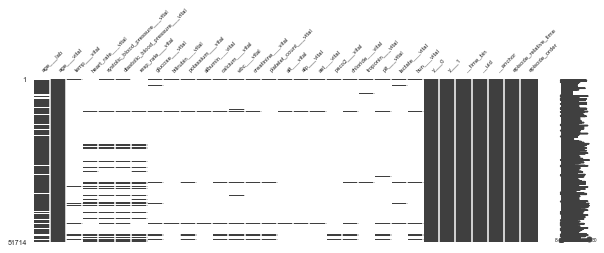

--- Test MVTS DF missingness before imputation


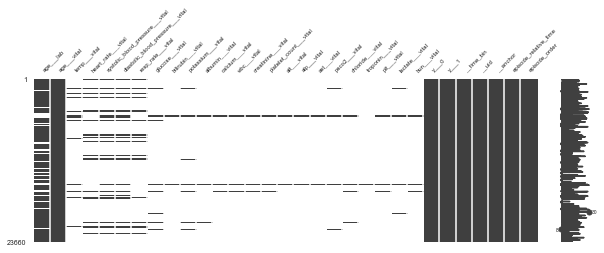

--- Training MVTS DF missingness after imputation


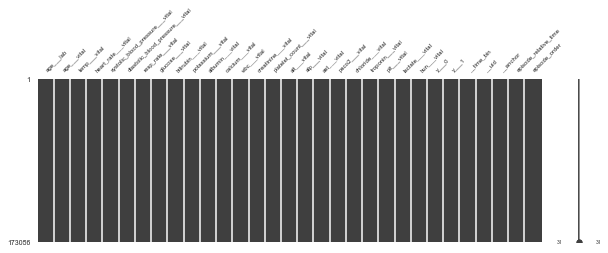

--- Validation MVTS DF missingness after imputation


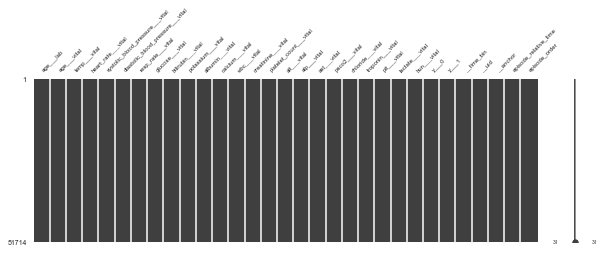

--- Validation MVTS DF missingness after imputation


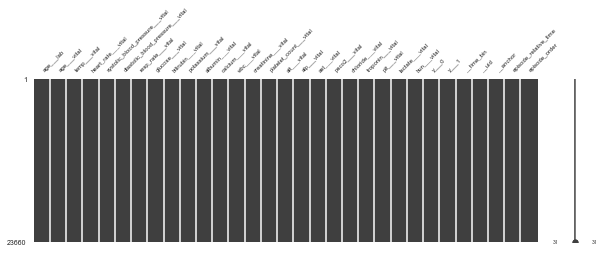

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- Fix lower boundary for potassium by nan
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by nan
--- Fix lower boundary for calcium by nan
--- Fix upper boundary for wbc by nan
--- Fix lower boundary for wbc by nan
--- Fix upper boundary for creatinine by nan
--- Fix lower boundary for creatinine by nan
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan
--- Fix lower boundary for alt by nan
--- Fix upper boundary for alp by nan
--- Fix lower boundary for alp by nan
--- Fix upper boundary for ast by nan
--- Fix lower boundary for ast by nan
--- Fix upper boundary for paco2 by nan
--- Fix lower boundary for paco2 by nan
--- Fix upper boundary for chloride by nan
--- Fix lower boundary for chloride by na

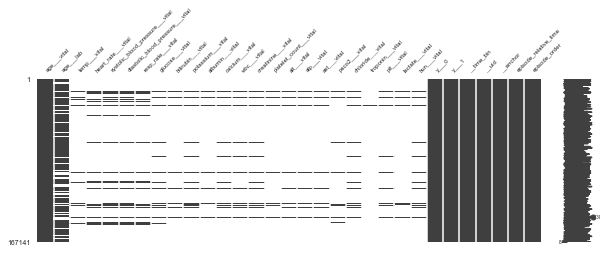

--- Validation MVTS DF missingness before imputation


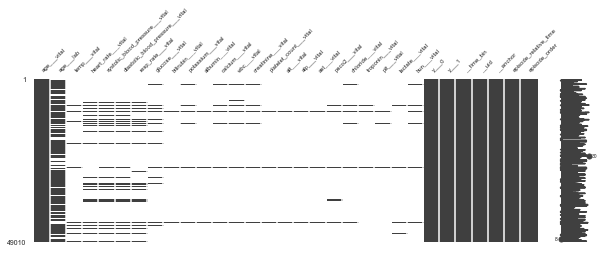

--- Test MVTS DF missingness before imputation


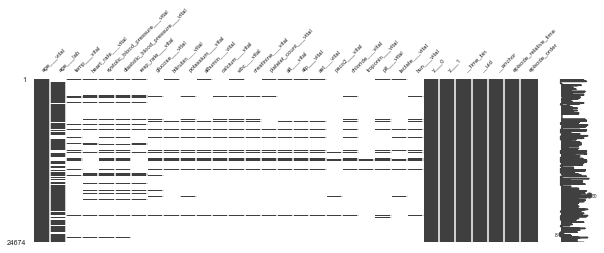

--- Training MVTS DF missingness after imputation


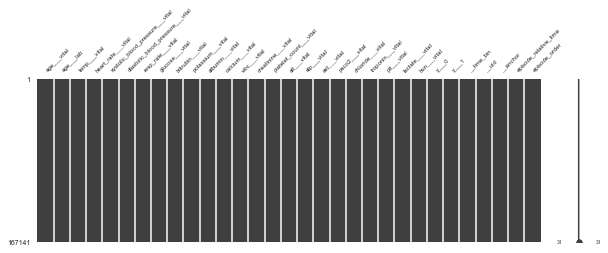

--- Validation MVTS DF missingness after imputation


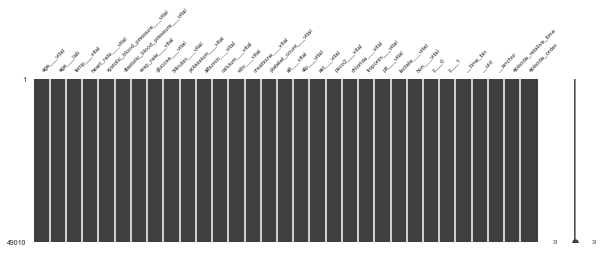

--- Validation MVTS DF missingness after imputation


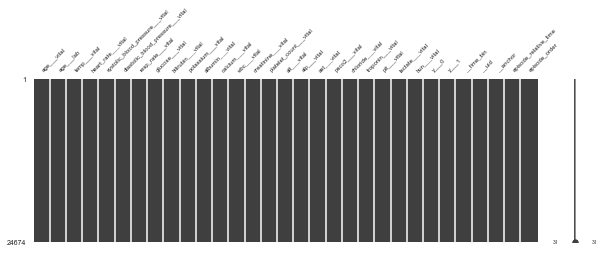

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

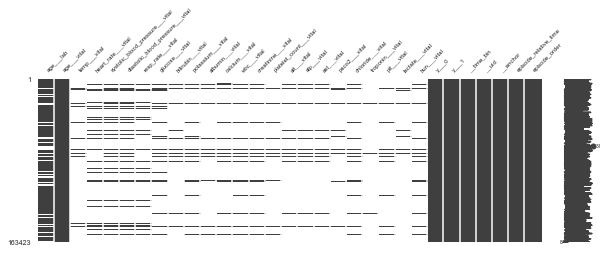

--- Validation MVTS DF missingness before imputation


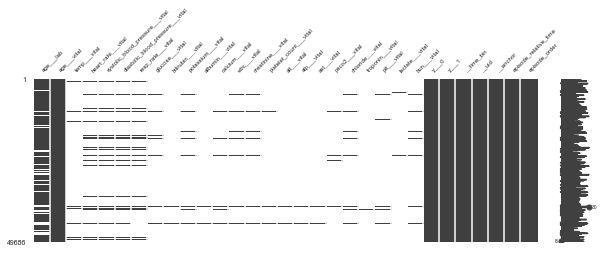

--- Test MVTS DF missingness before imputation


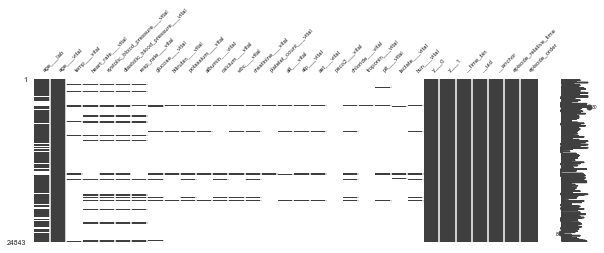

--- Training MVTS DF missingness after imputation


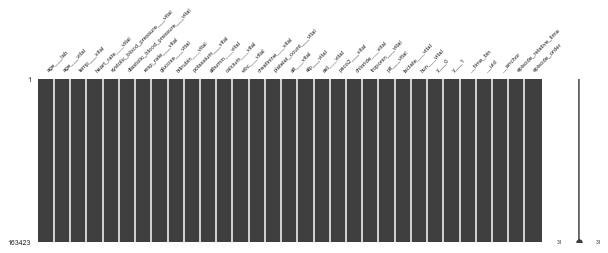

--- Validation MVTS DF missingness after imputation


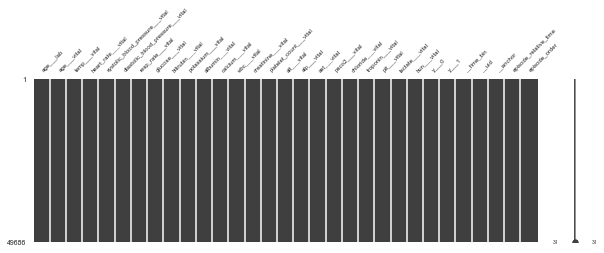

--- Validation MVTS DF missingness after imputation


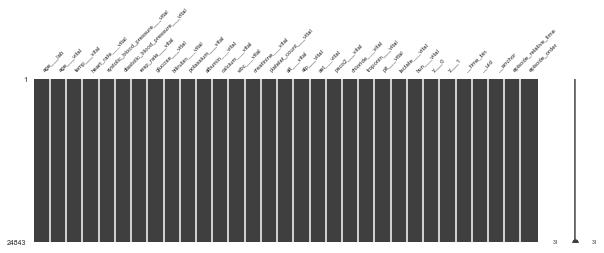

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

31/31 [==============================] - 2s 80ms/step - loss: 0.2220 - val_loss: 0.2447
Epoch 71/100
31/31 [==============================] - 2s 80ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 72/100
31/31 [==============================] - 2s 78ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 73/100
31/31 [==============================] - 2s 78ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 74/100
31/31 [==============================] - 2s 79ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 75/100
31/31 [==============================] - 2s 80ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 76/100
31/31 [==============================] - 3s 82ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 77/100
31/31 [==============================] - 3s 81ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 78/100
31/31 [==============================] - 3s 81ms/step - loss: 0.2219 - val_loss: 0.2447
Epoch 79/100
31/31 [==============================] - 2s 80ms/step - loss: 0.2219 - val_loss: 0.2447
Epo

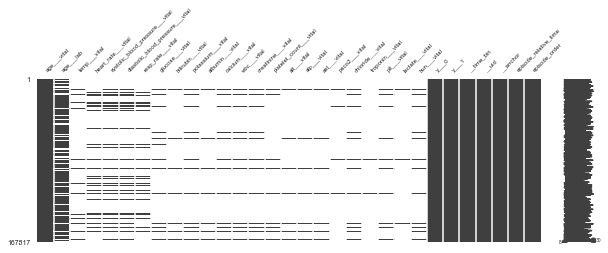

--- Validation MVTS DF missingness before imputation


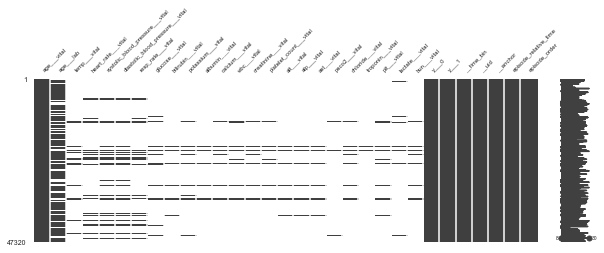

--- Test MVTS DF missingness before imputation


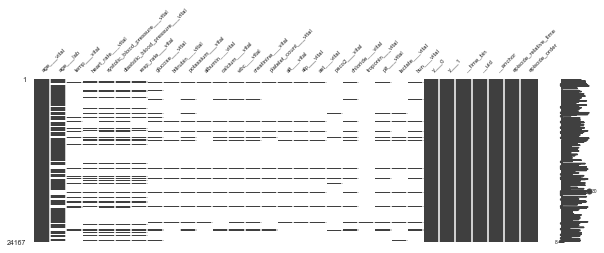

--- Training MVTS DF missingness after imputation


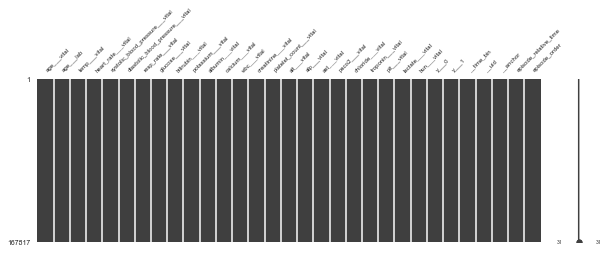

--- Validation MVTS DF missingness after imputation


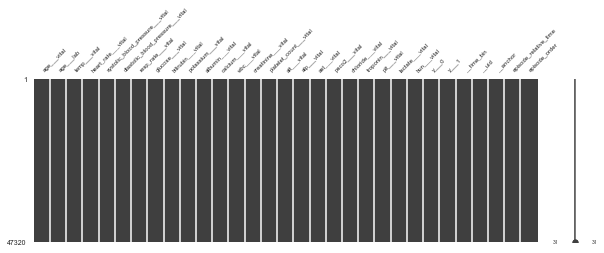

--- Validation MVTS DF missingness after imputation


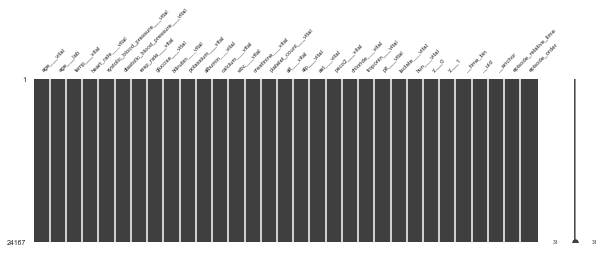

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

Success! 2D resposne data --- y_pred --- has shape: (143, 2)
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 21.0
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 21.0
--- Standardize temp
--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by 460.0
--- Fix lower boundary for glucose by 49.0
--- Fix upper boundary for bilirubin by 50.0
--- Fix lower boundary for bilirubin by 0.0
--- Fix upper boundary for potassium by 6.6
--- Fix lower boundary for potassium by 2.4
--- Fix upper boundary for albumin by 5.0
--- Fix lower boundary for albumin by 1.0


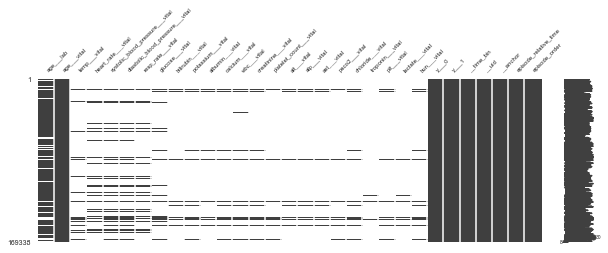

--- Validation MVTS DF missingness before imputation


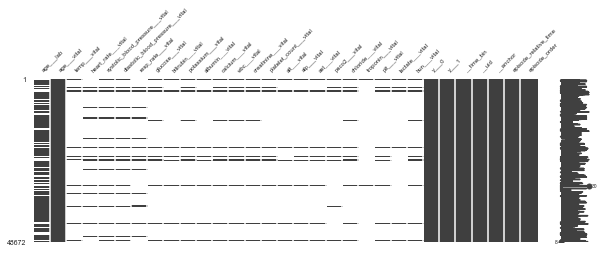

--- Test MVTS DF missingness before imputation


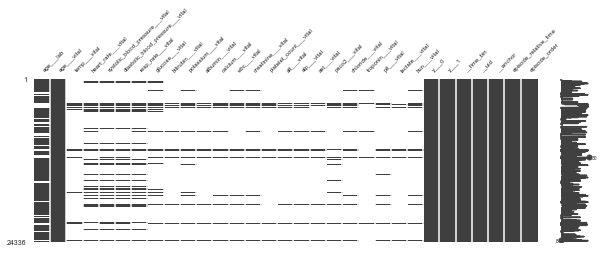

--- Training MVTS DF missingness after imputation


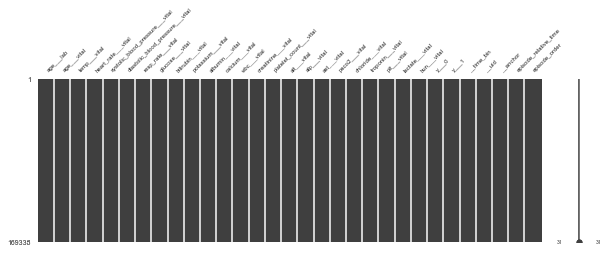

--- Validation MVTS DF missingness after imputation


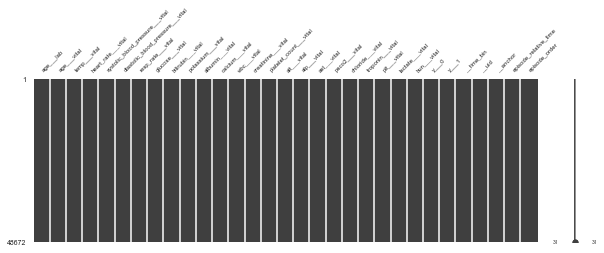

--- Validation MVTS DF missingness after imputation


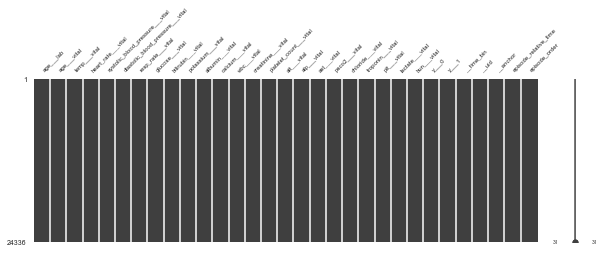

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

32/32 [==============================] - 2s 60ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 5/100
32/32 [==============================] - 2s 60ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 6/100
32/32 [==============================] - 2s 60ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 7/100
32/32 [==============================] - 2s 62ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 8/100
32/32 [==============================] - 2s 63ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 9/100
32/32 [==============================] - 2s 70ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 10/100
32/32 [==============================] - 2s 64ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 11/100
32/32 [==============================] - 2s 64ms/step - loss: 0.2034 - val_loss: 0.2680
Epoch 12/100
32/32 [==============================] - 2s 67ms/step - loss: 0.2034 - val_loss: 0.2680
current batch of testing tfds shape (batch_size, time, variables): (32, 1, 2)
current batch of testing tfds s

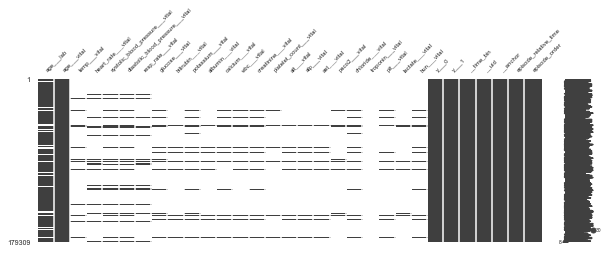

--- Validation MVTS DF missingness before imputation


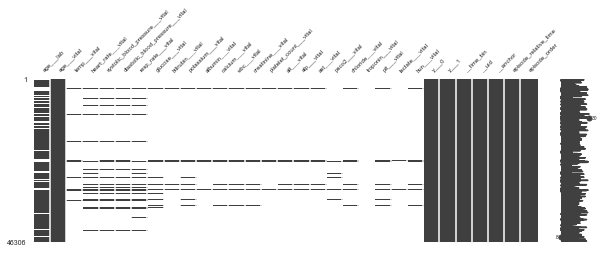

--- Test MVTS DF missingness before imputation


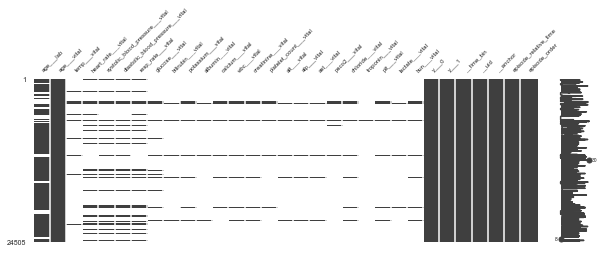

--- Training MVTS DF missingness after imputation


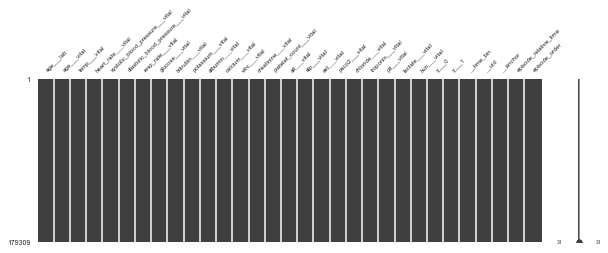

--- Validation MVTS DF missingness after imputation


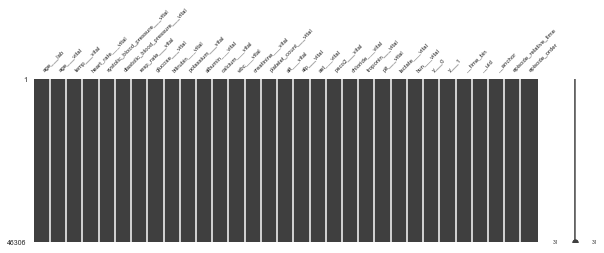

--- Validation MVTS DF missingness after imputation


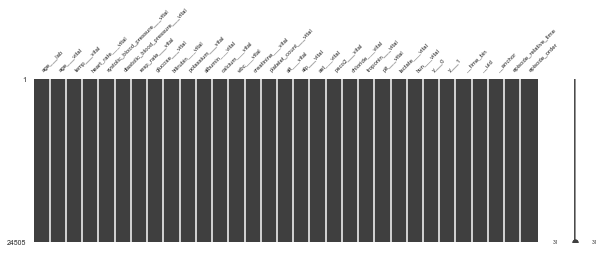

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

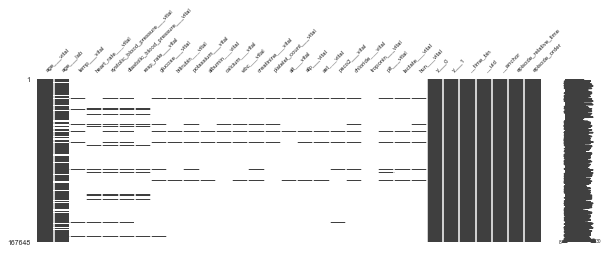

--- Validation MVTS DF missingness before imputation


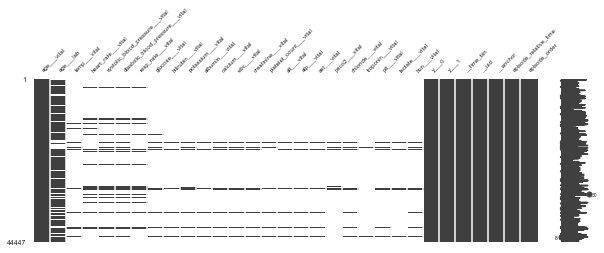

--- Test MVTS DF missingness before imputation


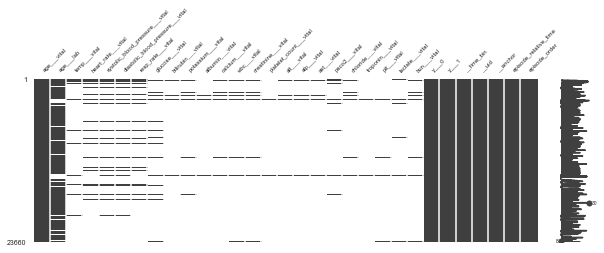

--- Training MVTS DF missingness after imputation


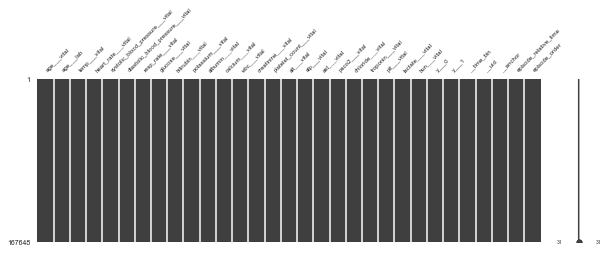

--- Validation MVTS DF missingness after imputation


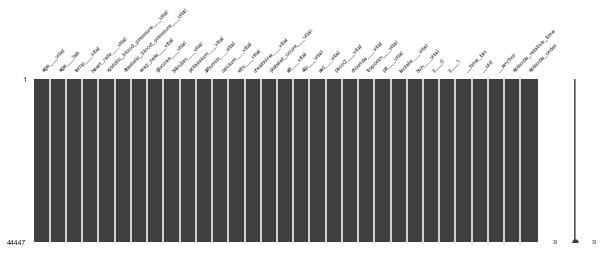

--- Validation MVTS DF missingness after imputation


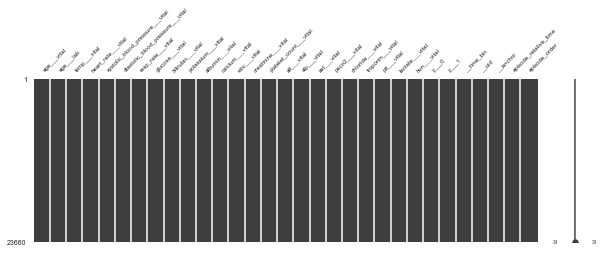

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

31/31 [==============================] - 3s 89ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 3/100
31/31 [==============================] - 3s 86ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 4/100
31/31 [==============================] - 3s 89ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 5/100
31/31 [==============================] - 3s 86ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 6/100
31/31 [==============================] - 3s 82ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 7/100
31/31 [==============================] - 3s 85ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 8/100
31/31 [==============================] - 3s 83ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 9/100
31/31 [==============================] - 3s 88ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 10/100
31/31 [==============================] - 3s 90ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 11/100
31/31 [==============================] - 3s 94ms/step - loss: 0.1658 - val_loss: 0.2153
Epoch 12/1

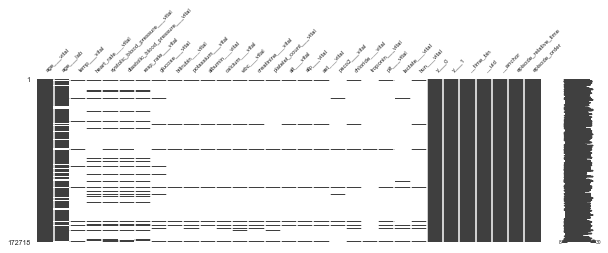

--- Validation MVTS DF missingness before imputation


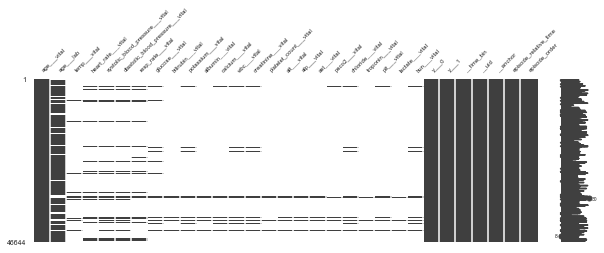

--- Test MVTS DF missingness before imputation


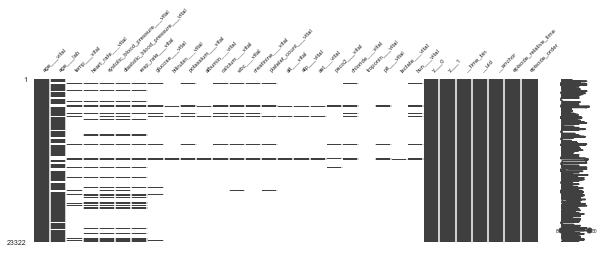

--- Training MVTS DF missingness after imputation


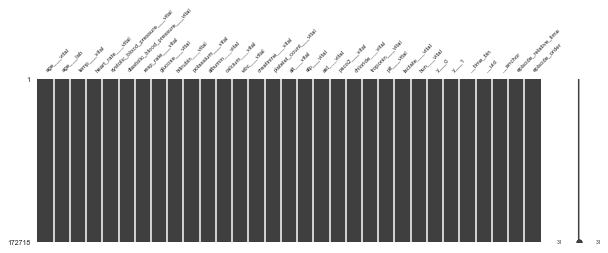

--- Validation MVTS DF missingness after imputation


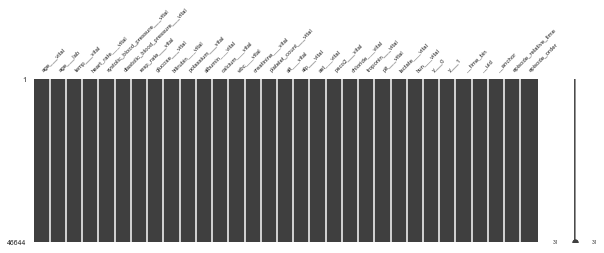

--- Validation MVTS DF missingness after imputation


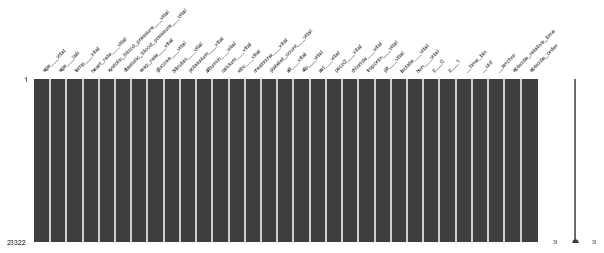

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

32/32 [==============================] - 2s 69ms/step - loss: 0.2288 - val_loss: 0.3375
Epoch 38/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2287 - val_loss: 0.3375
Epoch 39/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2287 - val_loss: 0.3375
Epoch 40/100
32/32 [==============================] - 2s 69ms/step - loss: 0.2286 - val_loss: 0.3376
Epoch 41/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2286 - val_loss: 0.3375
Epoch 42/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2286 - val_loss: 0.3375
Epoch 43/100
32/32 [==============================] - 2s 70ms/step - loss: 0.2285 - val_loss: 0.3376
Epoch 44/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2285 - val_loss: 0.3375
Epoch 45/100
32/32 [==============================] - 2s 67ms/step - loss: 0.2285 - val_loss: 0.3375
Epoch 46/100
32/32 [==============================] - 2s 69ms/step - loss: 0.2285 - val_loss: 0.3374
Epo

--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- Fix lower boundary for potassium by nan
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by nan
--- Fix lower boundary for calcium by nan
--- Fix upper boundary for wbc by nan
--- Fix lower boundary for wbc by nan
--- Fix upper boundary for creatinine by nan
--- Fix lower boundary for creatinine by nan
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan
--- Fix lower boundary for alt by nan
--- Fix upper boundary for alp by nan
--- Fix lower boundary for alp by nan
--- Fix upper boundary for ast by nan
--- Fix lower boundary for ast by nan
--- Fix upper boundary for paco2 by nan
--- Fix lower boundary for paco2 by nan
--- Fix upper boundary for chloride by nan
--- Fix lower boundary for chloride by na

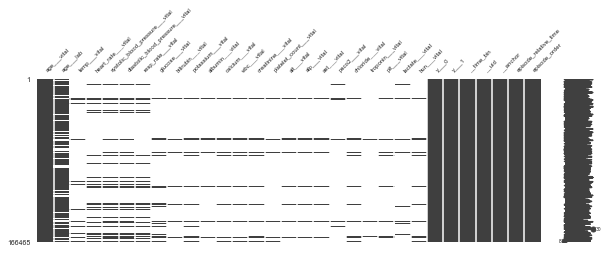

--- Validation MVTS DF missingness before imputation


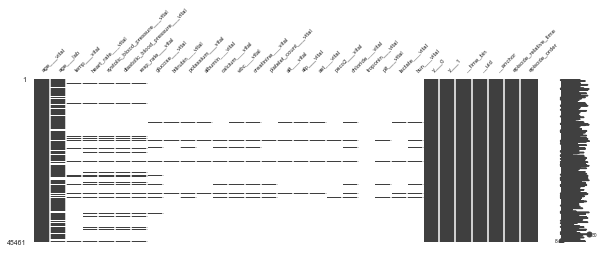

--- Test MVTS DF missingness before imputation


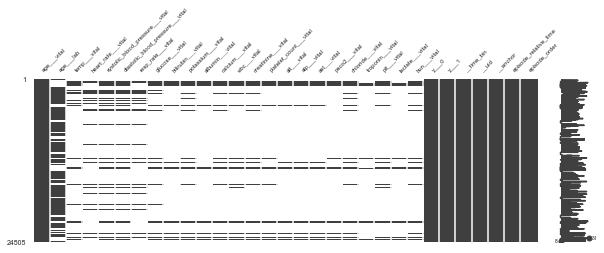

--- Training MVTS DF missingness after imputation


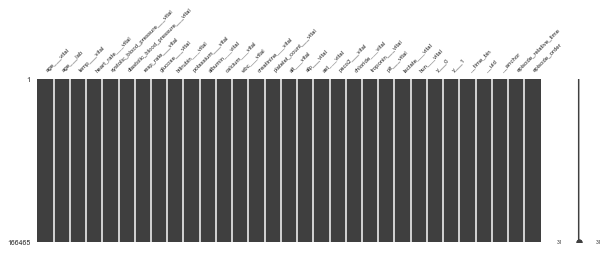

--- Validation MVTS DF missingness after imputation


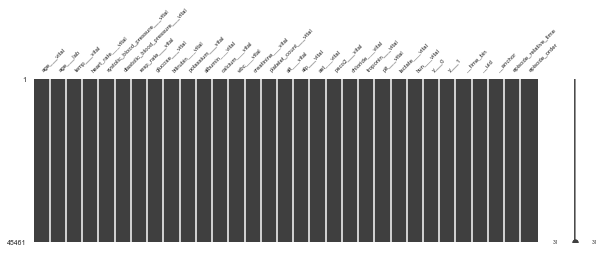

--- Validation MVTS DF missingness after imputation


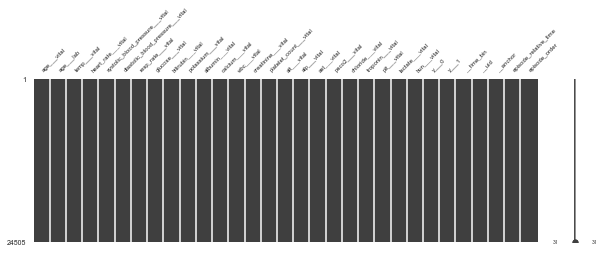

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

Success! 2D resposne data --- y_pred --- has shape: (145, 2)


In [7]:
# define the episode
bsi_stream.engineer.DefineEpisode(input_time_len=7*24*60, output_time_len=1, time_resolution=60, time_lag=0, anchor_gap=None)
# regression evaluation
eval_mtrx_folds = pd.DataFrame()


# all subjects
for i in range(10):
    
    train_df, valid_df, test_df, train_tfds, valid_tfds, test_tfds = bsi_stream.engineer.BuildMVTS(csv_pool_path, nsbj=1000, valid_frac=0.2, test_frac=0.1, batch_size=32, impute_input='median', impute_output='median', return_data=True)
    
    keras.backend.clear_session()
    input_shape = list(train_tfds.element_spec[0].shape)[1:3]
    mdl = keras.models.Sequential([
        keras.layers.LSTM(64, return_sequences=False, input_shape=input_shape),
        keras.layers.Dense(2, activation='softmax'),
        keras.layers.Reshape([1, -1])
    ])
    mdl.summary()

    # compile and run the model
    mdl.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=1e-3))
    callback = EarlyStopping(monitor='val_loss', patience=10)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    
    y, y_pred, eval_mtrx = bsi_stream.reporter.eval_mtrx_tfds(test_tfds, mdl)
    eval_mtrx['fold'] = i+1
    eval_mtrx_folds = pd.concat([eval_mtrx_folds, eval_mtrx],sort=False)
    

In [8]:
eval_mtrx_folds

response       auc        r2  fold
0  variable 1  0.583893 -0.143783     1
1  variable 2  0.583893 -0.143783     1
0  variable 1  0.562299 -0.007672     2
1  variable 2  0.562299 -0.007672     2
0  variable 1  0.553957 -0.002987     3
1  variable 2  0.553957 -0.002986     3
0  variable 1  0.619163 -0.003991     4
1  variable 2  0.619163 -0.003990     4
0  variable 1  0.341667 -0.031671     5
1  variable 2  0.341667 -0.031671     5
0  variable 1  0.595885  0.049838     6
1  variable 2  0.595885  0.049838     6
0  variable 1  0.433230 -0.004160     7
1  variable 2  0.433230 -0.004160     7
0  variable 1  0.526651 -0.026497     8
1  variable 2  0.526651 -0.026497     8
0  variable 1  0.302239 -0.187313     9
1  variable 2  0.302239 -0.187313     9
0  variable 1  0.696809  0.008310    10
1  variable 2  0.696809  0.008310    10

### RNN - deeper layers


 
Success! An episode is - 
    - predicting 1 minutes outputs into the future
    - using 14400 minutes long inputs with 0 minutes lag from the last input observation
    - increasing by every 60 minutes
    - at least 14401 minutes apart from the previous episode
 
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 18.0
--- Standardize temp
--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by nan
--- Fix lower boundary for systolic_blood_pressure by nan
--- Fix upper boundary for diastolic_blood_pressure by nan
--- Fix lower boundary for diastolic_blood_pressure by nan
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by nan
--- Fix lower boundary for glucose by nan
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- 

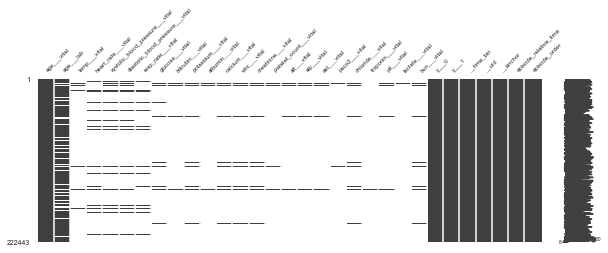

--- Validation MVTS DF missingness before imputation


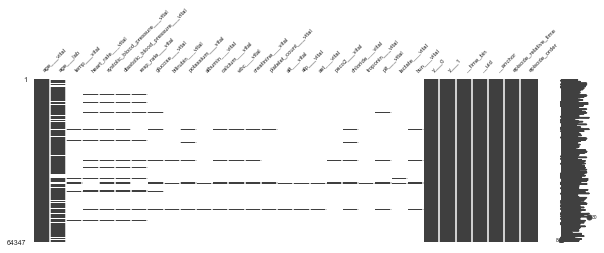

--- Test MVTS DF missingness before imputation


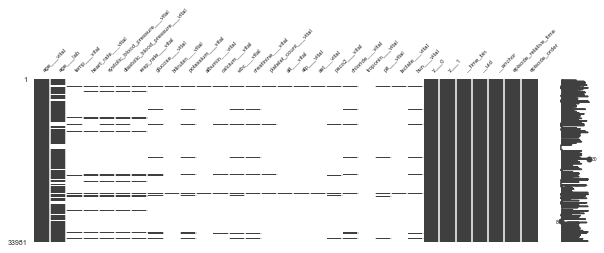

--- Training MVTS DF missingness after imputation


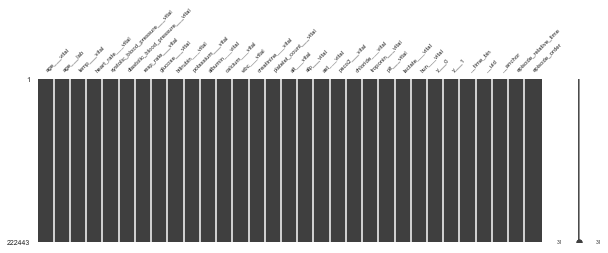

--- Validation MVTS DF missingness after imputation


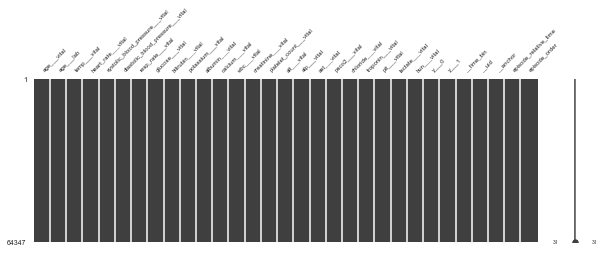

--- Validation MVTS DF missingness after imputation


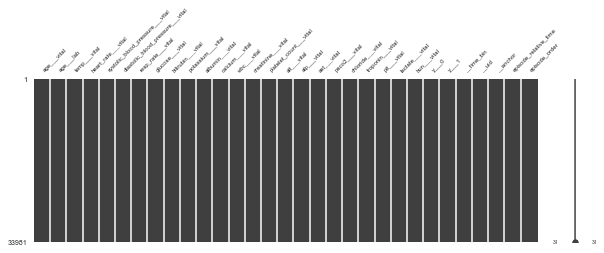

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

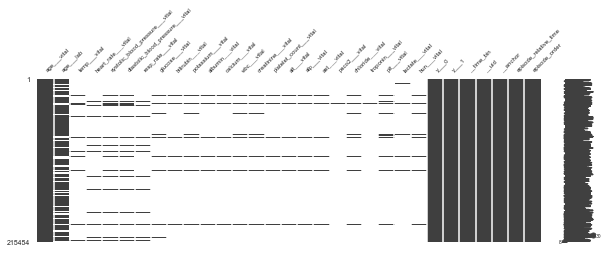

--- Validation MVTS DF missingness before imputation


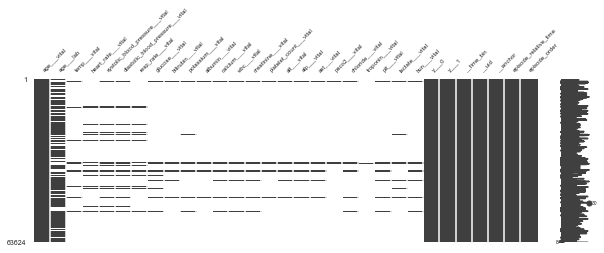

--- Test MVTS DF missingness before imputation


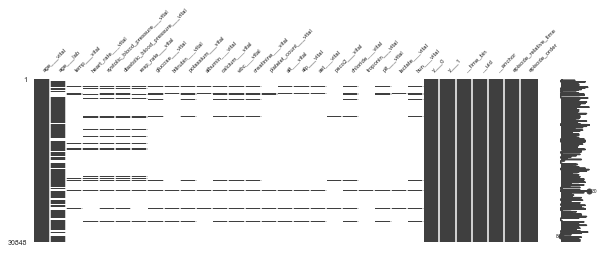

--- Training MVTS DF missingness after imputation


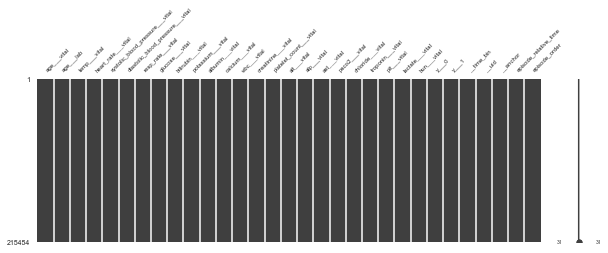

--- Validation MVTS DF missingness after imputation


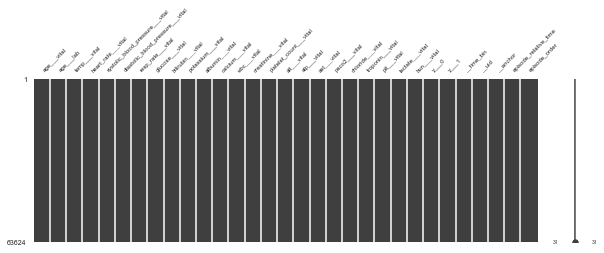

--- Validation MVTS DF missingness after imputation


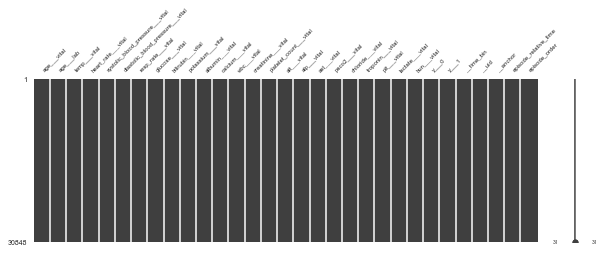

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

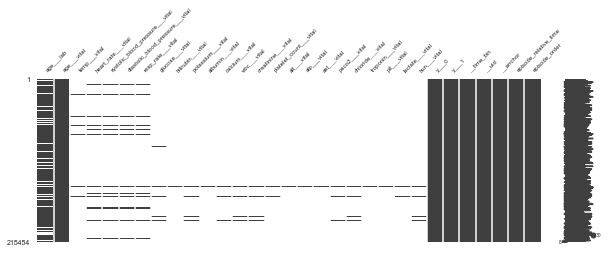

--- Validation MVTS DF missingness before imputation


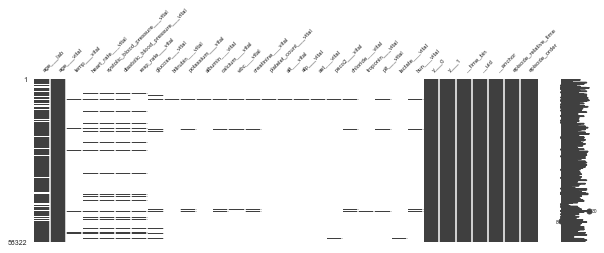

--- Test MVTS DF missingness before imputation


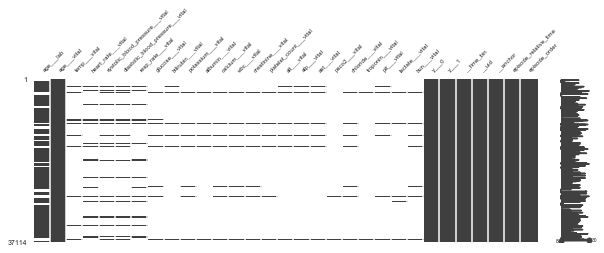

--- Training MVTS DF missingness after imputation


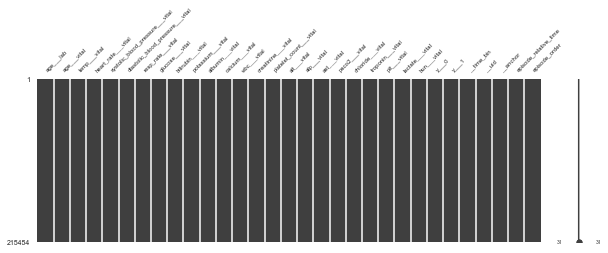

--- Validation MVTS DF missingness after imputation


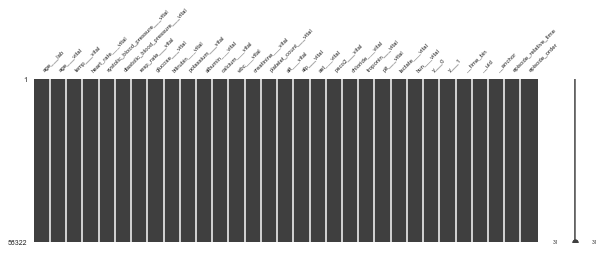

--- Validation MVTS DF missingness after imputation


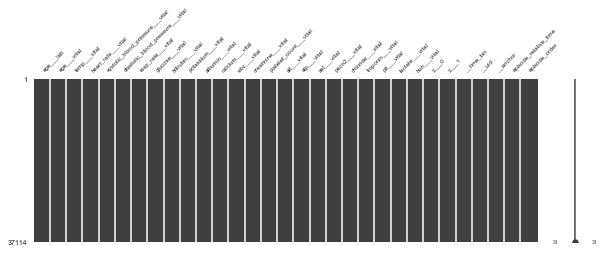

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

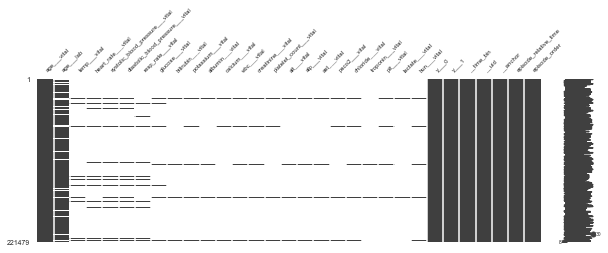

--- Validation MVTS DF missingness before imputation


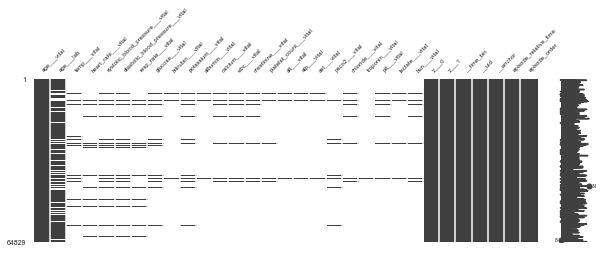

--- Test MVTS DF missingness before imputation


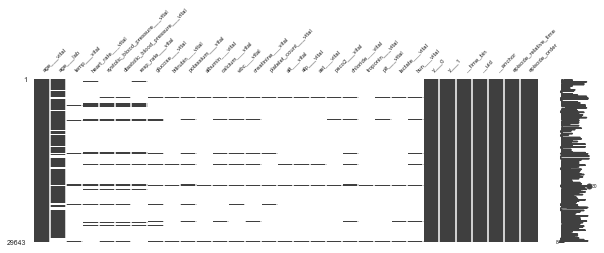

--- Training MVTS DF missingness after imputation


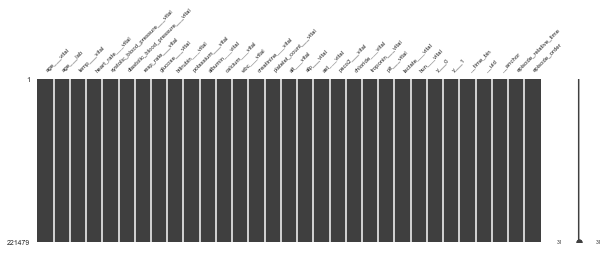

--- Validation MVTS DF missingness after imputation


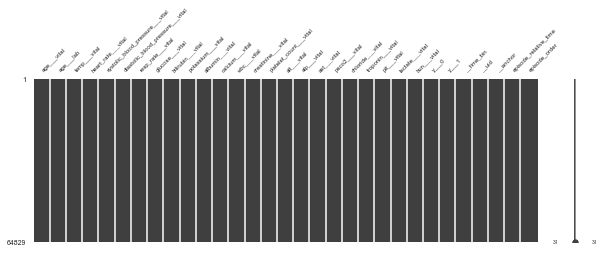

--- Validation MVTS DF missingness after imputation


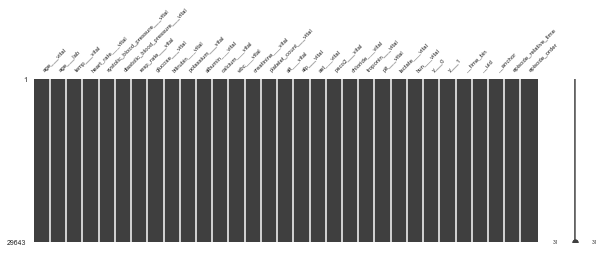

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix order of level: y___0
Success! Engineer has new attributes mvts_df, input_vars, output_vars. 
Success! Engineer has 3 new attributes train_df, valid_df and test_df. 
--- Training MVTS DF missingness before imputation


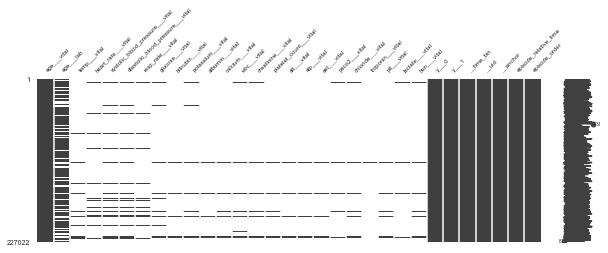

--- Validation MVTS DF missingness before imputation


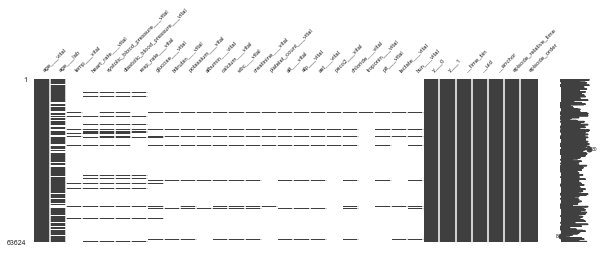

--- Test MVTS DF missingness before imputation


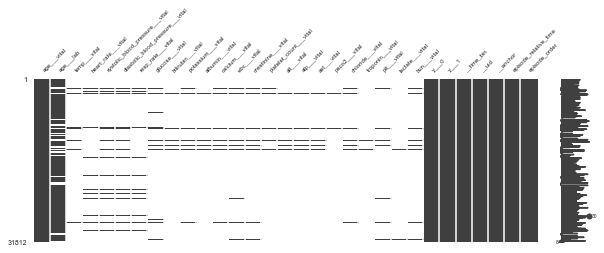

--- Training MVTS DF missingness after imputation


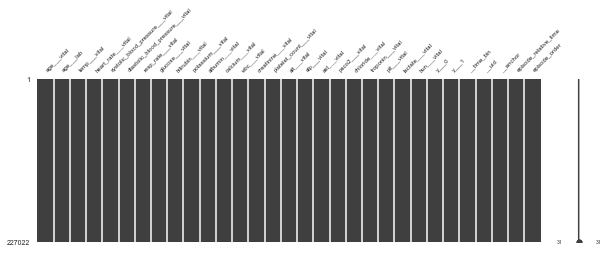

--- Validation MVTS DF missingness after imputation


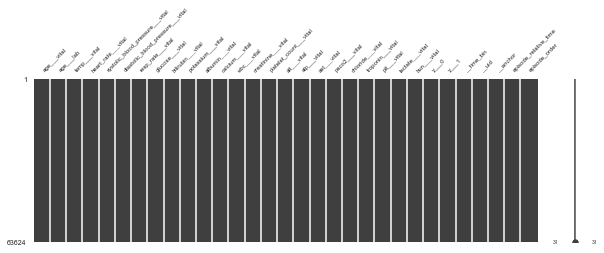

--- Validation MVTS DF missingness after imputation


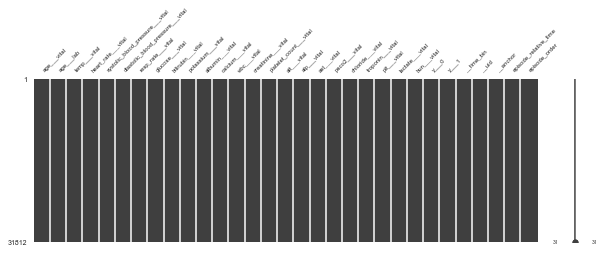

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

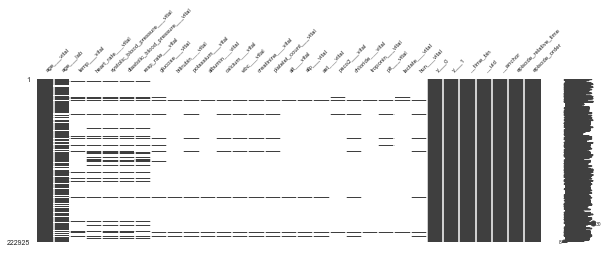

--- Validation MVTS DF missingness before imputation


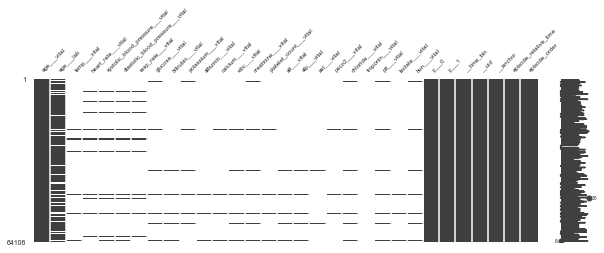

--- Test MVTS DF missingness before imputation


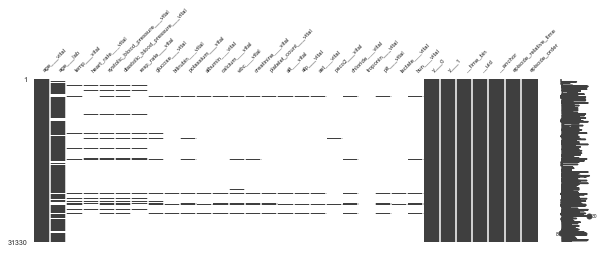

--- Training MVTS DF missingness after imputation


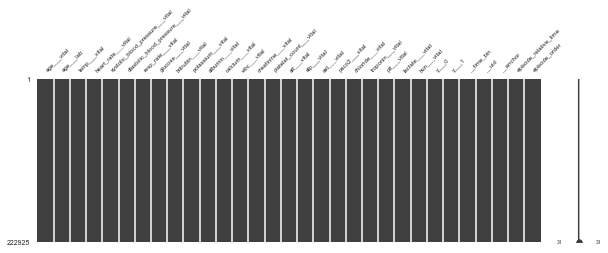

--- Validation MVTS DF missingness after imputation


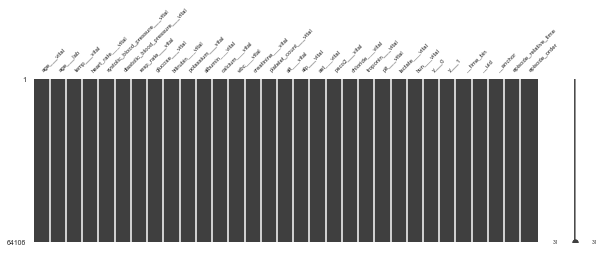

--- Validation MVTS DF missingness after imputation


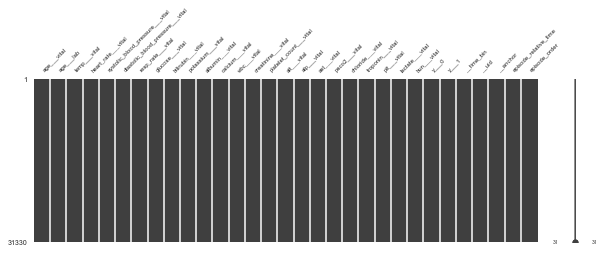

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix upper boundary for potassium by 6.6
--- Fix lower boundary for potassium by 2.4
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for calcium by 12.0
--- Fix lower boundary for calcium by 6.1
--- Fix upper boundary for wbc by 33.85
--- Fix lower boundary for wbc by 0.1
--- Fix upper boundary for creatinine by 10.0
--- Fix lower boundary for creatinine by 0.0
--- Fix upper boundary for platelet_count by nan
--- Fix lower boundary for platelet_count by nan
--- Fix upper boundary for alt by nan
--- Fix lower boundary for alt by nan
--- Fix upper boundary for alp by nan
--- Fix lower boundary for alp by nan
--- Fix upper boundary for ast by nan
--- Fix lower boundary for ast by nan
--- Fix upper boundary for paco2 by nan
--- Fix lower boundary for paco2 by nan
--- Fix upper boundary for chloride by 132.0
--- Fix lower boundary for chloride by 83.0
--- Fix upper boundary for troponin by 23.5
--- Fix lower boundary for troponin

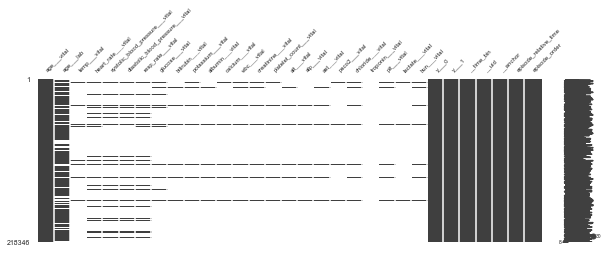

--- Validation MVTS DF missingness before imputation


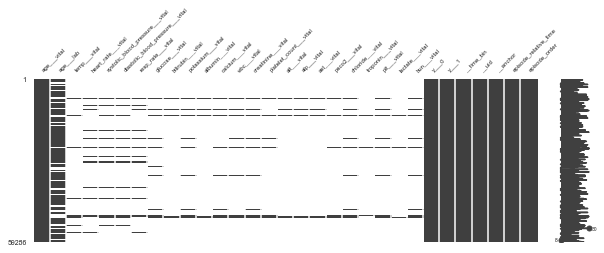

--- Test MVTS DF missingness before imputation


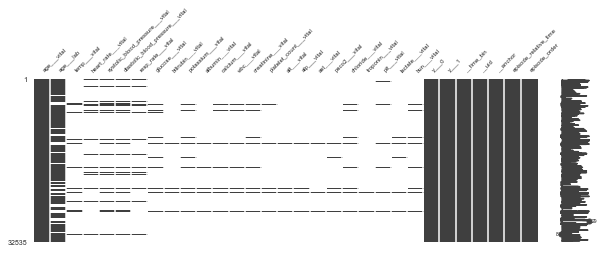

--- Training MVTS DF missingness after imputation


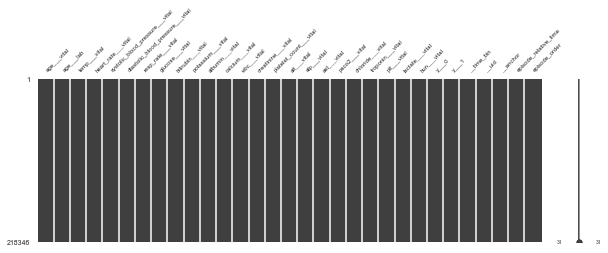

--- Validation MVTS DF missingness after imputation


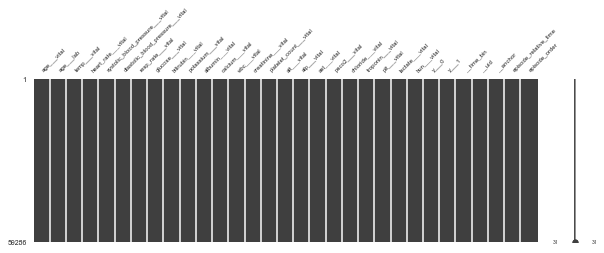

--- Validation MVTS DF missingness after imputation


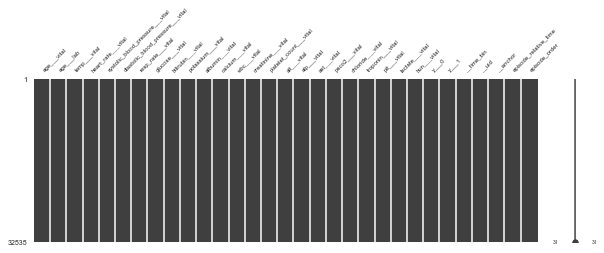

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

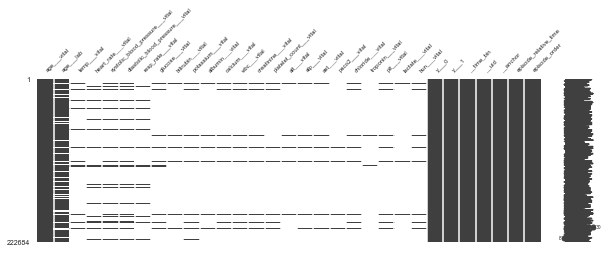

--- Validation MVTS DF missingness before imputation


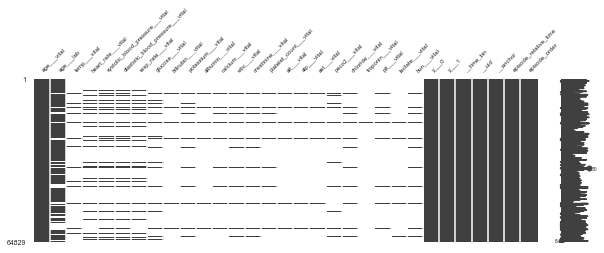

--- Test MVTS DF missingness before imputation


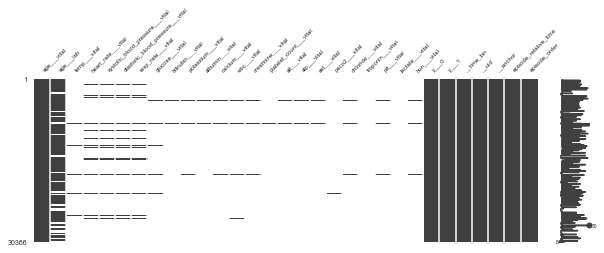

--- Training MVTS DF missingness after imputation


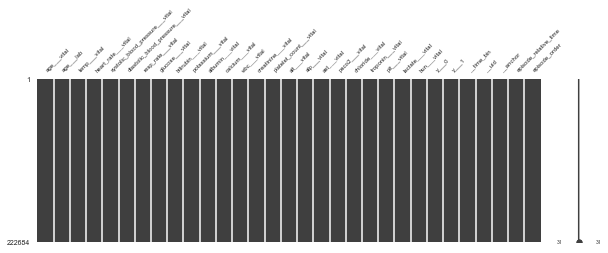

--- Validation MVTS DF missingness after imputation


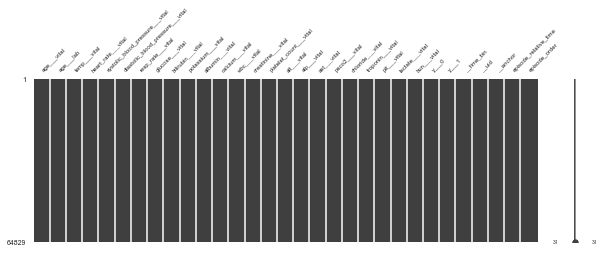

--- Validation MVTS DF missingness after imputation


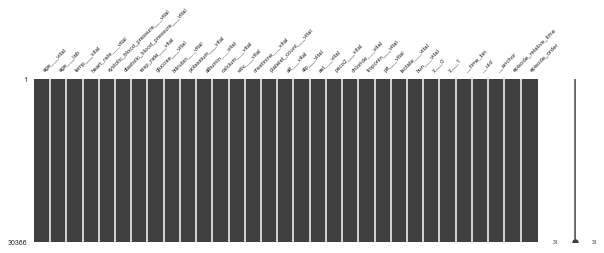

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

--- Fix lower boundary for bun by 1.0
--- Fix upper boundary for age by 110.0
--- Fix lower boundary for age by 18.0
--- Fix upper boundary for age by nan
--- Fix lower boundary for age by nan
--- Standardize temp
--- Fix upper boundary for heart_rate by nan
--- Fix lower boundary for heart_rate by nan
--- Fix upper boundary for systolic_blood_pressure by 100.0
--- Fix lower boundary for systolic_blood_pressure by 8.0
--- Fix upper boundary for diastolic_blood_pressure by 100.0
--- Fix lower boundary for diastolic_blood_pressure by 0.0
--- Fix upper boundary for resp_rate by nan
--- Fix lower boundary for resp_rate by nan
--- Fix upper boundary for glucose by nan
--- Fix lower boundary for glucose by nan
--- Fix upper boundary for bilirubin by nan
--- Fix lower boundary for bilirubin by nan
--- Fix upper boundary for potassium by nan
--- Fix lower boundary for potassium by nan
--- Fix upper boundary for albumin by nan
--- Fix lower boundary for albumin by nan
--- Fix upper boundary for

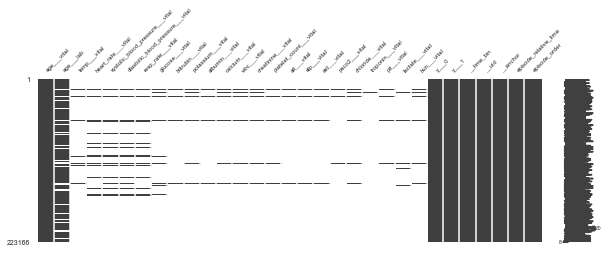

--- Validation MVTS DF missingness before imputation


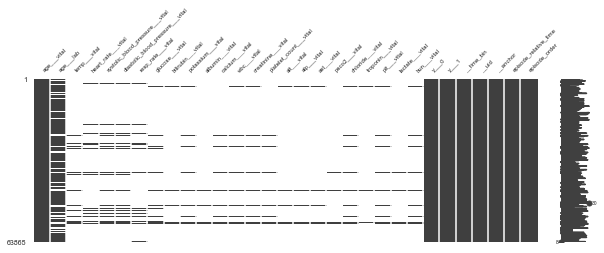

--- Test MVTS DF missingness before imputation


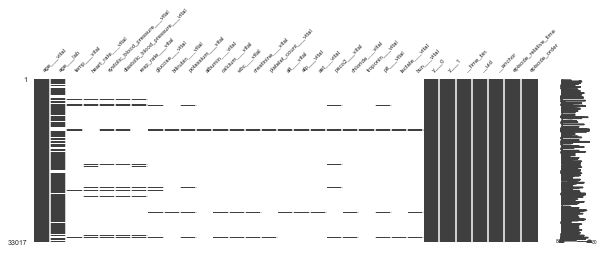

--- Training MVTS DF missingness after imputation


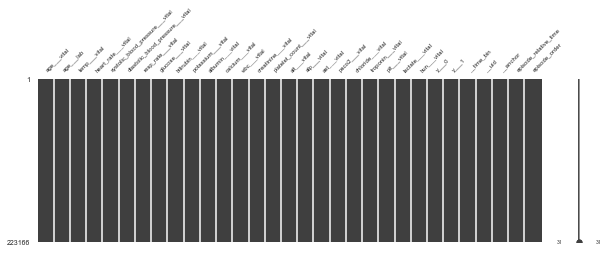

--- Validation MVTS DF missingness after imputation


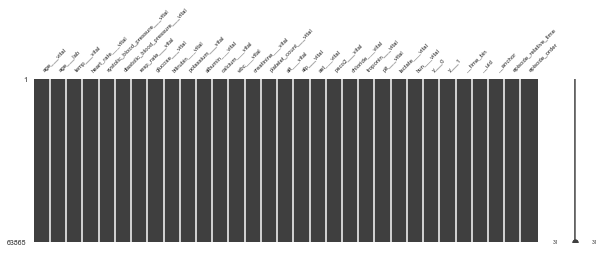

--- Validation MVTS DF missingness after imputation


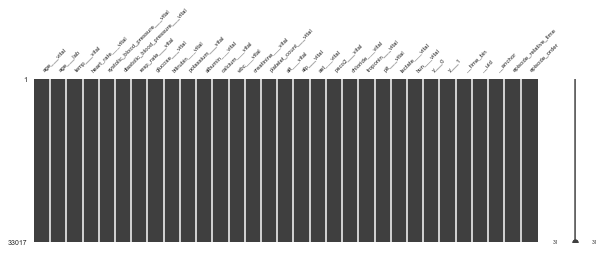

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

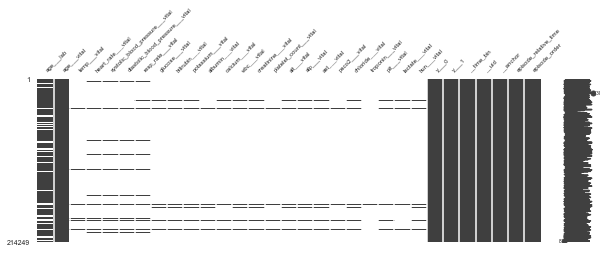

--- Validation MVTS DF missingness before imputation


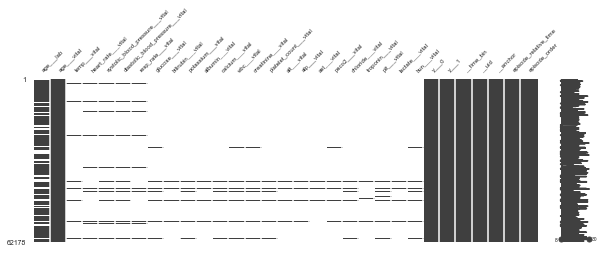

--- Test MVTS DF missingness before imputation


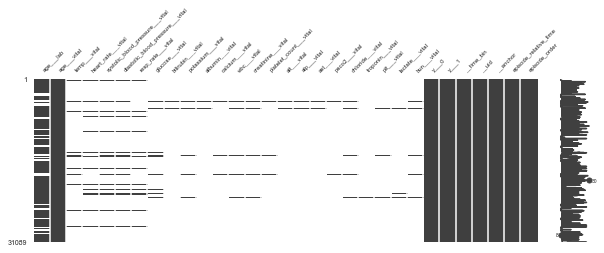

--- Training MVTS DF missingness after imputation


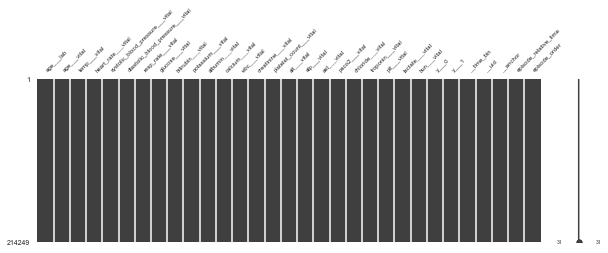

--- Validation MVTS DF missingness after imputation


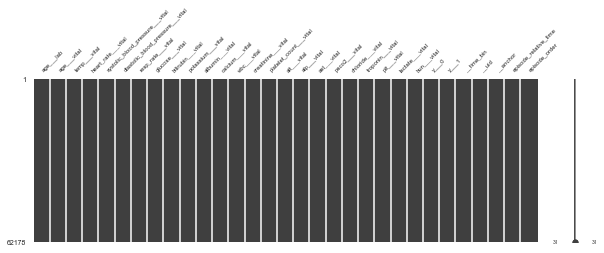

--- Validation MVTS DF missingness after imputation


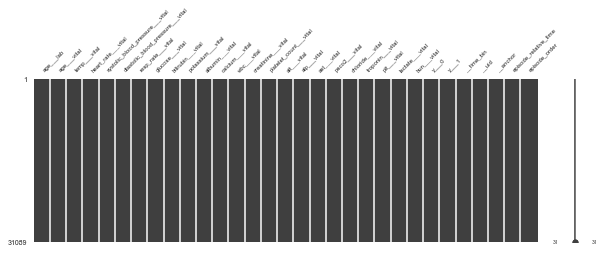

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___lab', 'age___vital', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

In [9]:
# define the episode
bsi_stream.engineer.DefineEpisode(input_time_len=10*24*60, output_time_len=1, time_resolution=60, time_lag=0, anchor_gap=None)
# regression evaluation
eval_mtrx_folds = pd.DataFrame()


# all subjects
for i in range(10):
    
    train_df, valid_df, test_df, train_tfds, valid_tfds, test_tfds = bsi_stream.engineer.BuildMVTS(csv_pool_path, nsbj=1000, valid_frac=0.2, test_frac=0.1, batch_size=32, impute_input='median', impute_output='median', return_data=True)
    
    keras.backend.clear_session()
    input_shape = list(train_tfds.element_spec[0].shape)[1:3]
    mdl = keras.models.Sequential([
        keras.layers.LSTM(64, return_sequences=True, input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(32, return_sequences=False),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation='softmax'),
        keras.layers.Reshape([1, -1])
    ])
    mdl.summary()

    # compile and run the model
    mdl.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=1e-3))
    callback = EarlyStopping(monitor='val_loss', patience=10)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-5)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    keras.backend.set_value(mdl.optimizer.learning_rate, 1e-6)
    his = mdl.fit(train_tfds, epochs=100, validation_data=valid_tfds, callbacks=[callback])
    
    y, y_pred, eval_mtrx = bsi_stream.reporter.eval_mtrx_tfds(test_tfds, mdl)
    eval_mtrx['fold'] = i+1
    eval_mtrx_folds = pd.concat([eval_mtrx_folds, eval_mtrx],sort=False)
    

Success: Querier has initiated a csv source dictionary in:../project1_15mins/meta_data/csv_source_dict_demo.json
Success: Querier has initiated a variable dictionary in:../project1_15mins/meta_data/variable_dict_demo.json
Success: Querier has updated csv source dictionary!
Success: Querier has updated variable dictionary!
Unable to read sql source dictionary. Use Querier.update_sql_source_dict() to build one.
 
Success! An episode is - 
    - predicting 1 minutes outputs into the future
    - using 10080 minutes long inputs with 0 minutes lag from the last input observation
    - increasing by every 60 minutes
    - at least 10081 minutes apart from the previous episode
 
--- Fix upper boundary for age by 89.3489904175222
--- Fix lower boundary for age by 23.6766198950491
--- Standardize temp
--- Fix upper boundary for heart_rate by 169.354444444444
--- Fix lower boundary for heart_rate by 31.846153846153804
--- Fix upper boundary for systolic_blood_pressure by 100.0
--- Fix lower boun

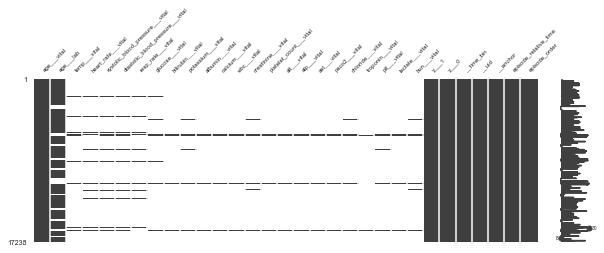

--- Validation MVTS DF missingness before imputation


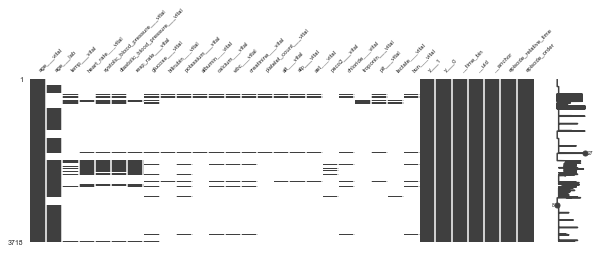

--- Test MVTS DF missingness before imputation


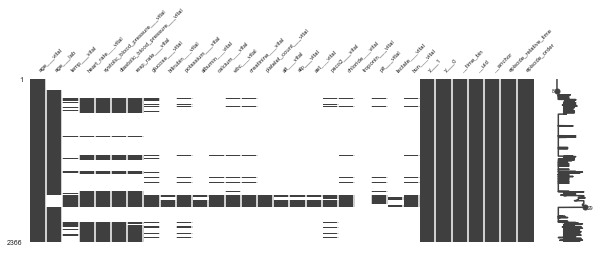

--- Training MVTS DF missingness after imputation


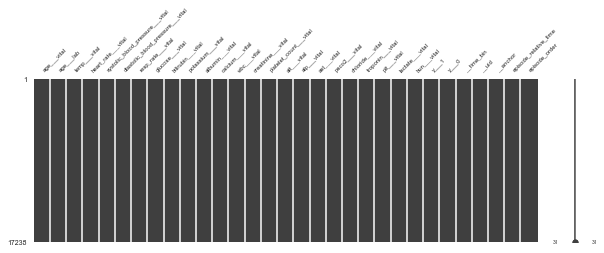

--- Validation MVTS DF missingness after imputation


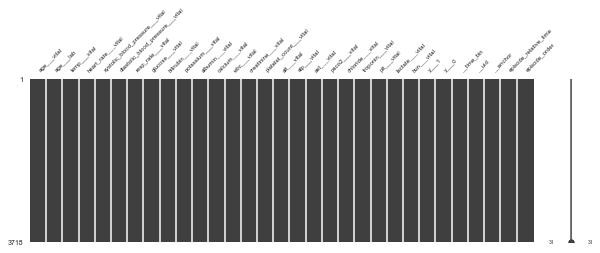

--- Validation MVTS DF missingness after imputation


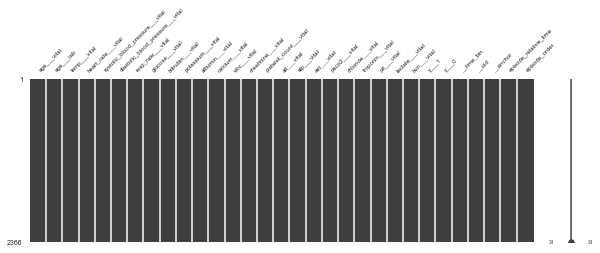

Success! Engineer has new attributes train_df_imputed, valid_df_imputed and test_df_imputed. 
Success! Engineer has new attributes train_tfds_imputed, valid_tfds_imputed and test_tfds_imputed. 
 

--------------------------------- Engineer Attributes List -------------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'input_vars', 'output_vars', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds_imputed', 'valid_tfds_imputed', 'test_tfds_imputed']

----------------------------------------- Inputs -----------------------------------------

['age___vital', 'age___lab', 'temp___vital', 'heart_rate___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'resp_rate___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'wbc___vital', 'creatinine___vital', 'plat

In [2]:
# set up
# 1. create a fairstream instance and update dictionaries
bsi_stream = FAIRStream.FAIRStream('../project1_15mins')# windows
# 2. specify csv pool folder dir
csv_pool_path = '../project1_15mins/csv_pool'
# define the episode
bsi_stream.engineer.DefineEpisode(input_time_len=7*24*60, output_time_len=1, time_resolution=60, time_lag=0, anchor_gap=None)
# regression evaluation
eval_mtrx_folds = pd.DataFrame()

train_df, valid_df, test_df, train_tfds, valid_tfds, test_tfds = bsi_stream.engineer.BuildMVTS(csv_pool_path, nsbj=100, valid_frac=0.2, test_frac=0.1, batch_size=32, impute_input='median', impute_output='median', return_data=True)
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = bsi_stream.engineer.ExtractXY()



In [4]:
X_train.shape

(17136, 24)

In [5]:
Y_train.shape

(102, 2)